## Context

You are a Data Scientist for a tourism company named "Visit with us". The Policy Maker of the company wants to enable and establish a viable business model to expand the customer base.

A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

One of the ways to expand the customer base is to introduce a new offering of packages.

Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

However, the marketing cost was quite high because customers were contacted at random without looking at the available information.

The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.

However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

You as a Data Scientist at "Visit with us" travel company have to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.

## Objective

To predict which customer is more likely to purchase the newly introduced travel package.

### Data Dictionary
Customer Details
1. CustomerID: Unique customer ID
2. ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
3. Age: Age of customer
4. TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
5. CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
6. Occupation: Occupation of customer
7. Gender: Gender of customer
8. NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
9. PreferredPropertyStar: Preferred hotel property rating by customer
10. MaritalStatus: Marital status of customer
11. NumberOfTrips: Average number of trips in a year by customer
12. Passport: The customer has a passport or not (0: No, 1: Yes)
13. Car: Whether the customers own a car or not (0: No, 1: Yes)
14. NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
15. Designation: Designation of the customer in the current organization
16. MonthlyIncome: Gross monthly income of the customer

Customer interaction data: 

1. PitchSatisfactionScore: Sales pitch satisfaction score
2. ProductPitched: Product pitched by the salesperson
3. NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
4. DurationOfPitch: Duration of the pitch by a salesperson to the customer

### Import necessary packages

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.impute import KNNImputer #Impute missing values using KNN Imputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

### Import Dataset and make a copy

In [2]:
tourism = pd.read_excel("Tourism.xlsx",sheet_name = "Tourism")
tourism.shape

(4888, 20)

* There are 4888 rows in the dataset

In [3]:
df = tourism.copy()

### Checking the first and last 5 rows and data types

In [4]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [5]:
df.tail()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0
4887,204887,1,36.0,Self Enquiry,1,14.0,Salaried,Male,4,4.0,Basic,4.0,Unmarried,3.0,1,3,1,2.0,Executive,24041.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

Observations:
* CustomerID can be removed as it doesnot play any role 
* Object columns can be converted to categroy 
* There are missing values in certain columns we need to impute them

### Converting Object to category 

In [7]:
df["Occupation"] = df["Occupation"].astype("category")
df["Gender"] = df["Gender"].astype("category")
df["ProductPitched"] = df["ProductPitched"].astype("category")
df["MaritalStatus"] = df["MaritalStatus"].astype("category")
df["Designation"] = df["Designation"].astype("category")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CustomerID                4888 non-null   int64   
 1   ProdTaken                 4888 non-null   int64   
 2   Age                       4662 non-null   float64 
 3   TypeofContact             4863 non-null   object  
 4   CityTier                  4888 non-null   int64   
 5   DurationOfPitch           4637 non-null   float64 
 6   Occupation                4888 non-null   category
 7   Gender                    4888 non-null   category
 8   NumberOfPersonVisiting    4888 non-null   int64   
 9   NumberOfFollowups         4843 non-null   float64 
 10  ProductPitched            4888 non-null   category
 11  PreferredPropertyStar     4862 non-null   float64 
 12  MaritalStatus             4888 non-null   category
 13  NumberOfTrips             4748 non-null   float6

- The memory usage is reduced from 764 KB to 564.4 KB

### Dropping customerid and checking missing values

In [9]:
df.drop(["CustomerID"], axis = 1, inplace = True)

In [10]:
df.isnull().sum().sort_values(ascending = False)

DurationOfPitch             251
MonthlyIncome               233
Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
TypeofContact                25
Gender                        0
CityTier                      0
Occupation                    0
ProductPitched                0
NumberOfPersonVisiting        0
Designation                   0
MaritalStatus                 0
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
ProdTaken                     0
dtype: int64

* Typeofcontact is the only categorical variable with missing data
* There are missing values in the dataset, we will perform analysis before imputing the missing values to understand the relationship between the variables

### Fixing gender and type of contact data

In [11]:
df["Gender"].replace('Fe Male','Female',inplace = True)

In [12]:
df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ProdTaken,4888,NaN,NaN,NaN,0.188216,0.390925,0,0,0,0,1
Age,4662,NaN,NaN,NaN,37.6223,9.31639,18,31,36,44,61
TypeofContact,4863,2,Self Enquiry,3444,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,4888,NaN,NaN,NaN,1.65426,0.916583,1,1,1,3,3
DurationOfPitch,4637,NaN,NaN,NaN,15.4908,8.51964,5,9,13,20,127
Occupation,4888,4,Salaried,2368,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,4888,2,Male,2916,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,4888,NaN,NaN,NaN,2.90507,0.724891,1,2,3,3,5
NumberOfFollowups,4843,NaN,NaN,NaN,3.70845,1.00251,1,3,4,4,6
ProductPitched,4888,5,Basic,1842,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Observations:
* More than 75% of the customers have not taken a Travel Package.
* Majority of customers have contacted through Self Enquiry.
* Age of the customers ranges from 18 to 61, with 75% of customers less than 44
* Duration of the pitch has max value of 127 minutes which might be an error, need to investigate
* 75% of the customers have taken 4 trips but we have a maximum value of 22, which suggests outlier but mean and median are quite close which indicates not many outliers are there
* There are 5 types of Travel Packages that were pitched to the customer of which Basic has highest number of pitches with 1842
* Almost 50% of the customers in the dataset are married
* There are 1842 Executives in the dataset
* Monthly income might have outliers as the customer with minimum income is 1000 and maximum is 98678

## Exploratory Data Analysis

### Univariate Analysis

In [13]:
# While doing univariate analysis of numerical variables we want to study their central tendency and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and returns the boxplots and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(x=feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(x=feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.histplot(x=feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='red', linestyle='-') # Add median to the histogram

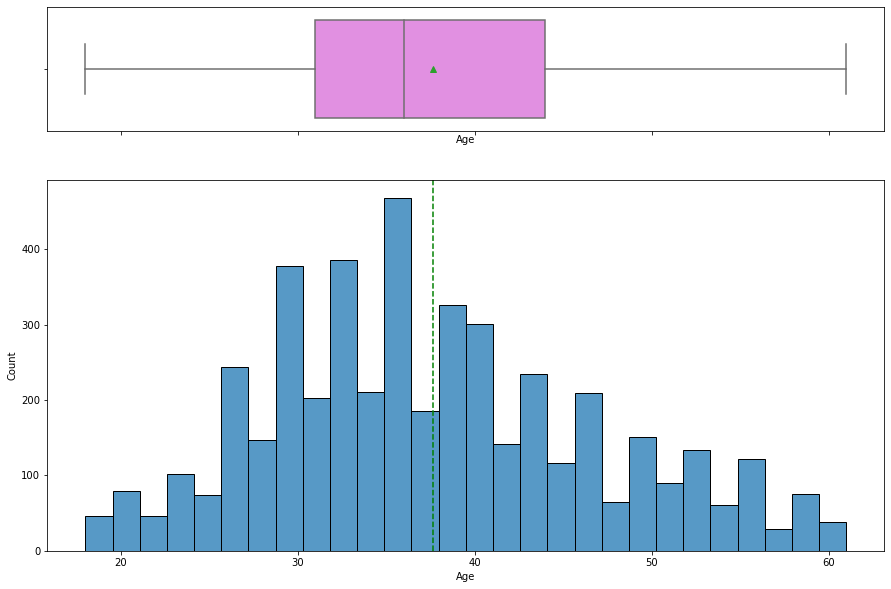

In [14]:
histogram_boxplot(df["Age"])

* Age of the customer has a normal distribution and there are no outliers

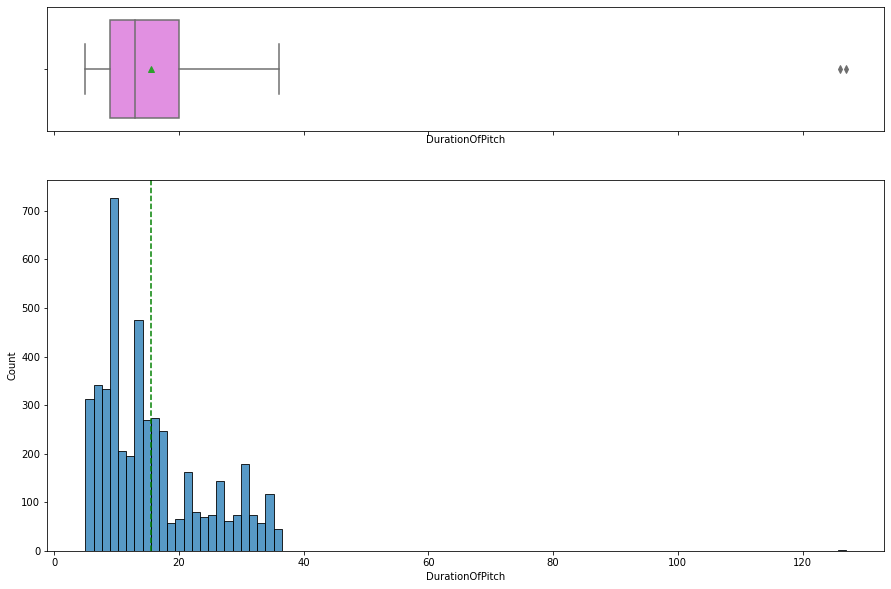

In [15]:
histogram_boxplot(df["DurationOfPitch"])

* As expected there are a couple of outliers, which needs to be investigated

In [16]:
df.sort_values(by = ["DurationOfPitch"],ascending = False).head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
3878,0,53.0,Company Invited,3,127.0,Salaried,Male,3,4.0,Basic,3.0,Married,4.0,0,1,1,2.0,Executive,22160.0
1434,0,NaN,Company Invited,3,126.0,Salaried,Male,2,3.0,Basic,3.0,Married,3.0,0,1,1,1.0,Executive,18482.0
2796,0,49.0,Self Enquiry,3,36.0,Small Business,Female,4,4.0,Standard,3.0,Divorced,5.0,0,4,0,1.0,Senior Manager,31182.0
2868,0,58.0,Self Enquiry,3,36.0,Small Business,Male,3,5.0,Super Deluxe,3.0,Married,5.0,0,3,0,1.0,AVP,32796.0
2648,1,39.0,Self Enquiry,1,36.0,Small Business,Male,4,4.0,Deluxe,5.0,Divorced,2.0,1,3,0,2.0,Manager,25351.0


- There are only 2 values with 127 and 126 minutes, we will treat them as missing values and impute with reasonable values before we start building our model.

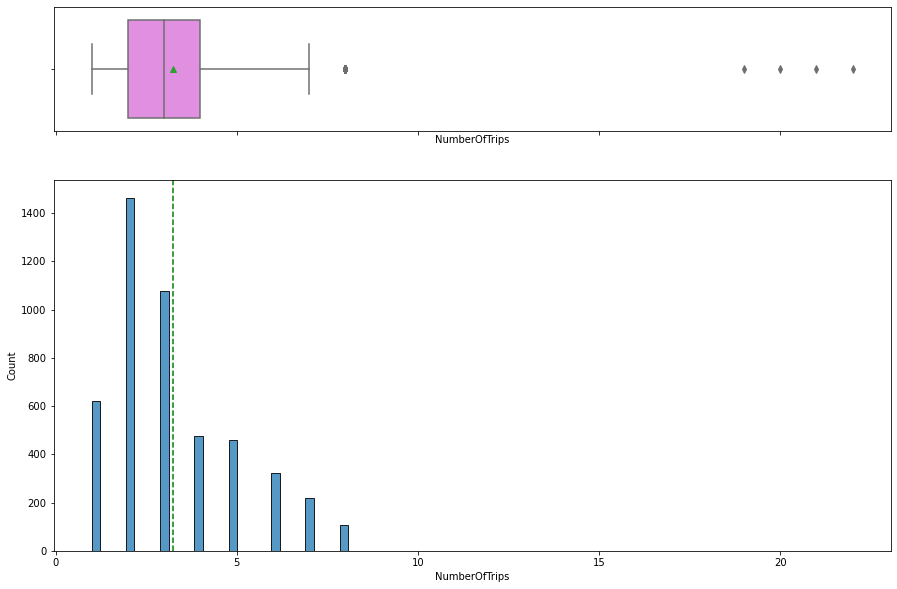

In [17]:
histogram_boxplot(df["NumberOfTrips"])

- Majority of cutomers take two Trips per year

In [18]:
df.sort_values(by = ["NumberOfTrips"], ascending = False).head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
3260,0,40.0,Company Invited,1,16.0,Salaried,Male,4,4.0,Deluxe,4.0,Unmarried,22.0,0,2,1,1.0,Manager,25460.0
816,0,39.0,Company Invited,1,15.0,Salaried,Male,3,3.0,Deluxe,4.0,Unmarried,21.0,0,2,1,0.0,Manager,21782.0
2829,1,31.0,Company Invited,1,11.0,Large Business,Male,3,4.0,Basic,3.0,Single,20.0,1,4,1,2.0,Executive,20963.0
385,1,30.0,Company Invited,1,10.0,Large Business,Male,2,3.0,Basic,3.0,Single,19.0,1,4,1,1.0,Executive,17285.0
3074,0,23.0,Self Enquiry,1,7.0,Salaried,Male,3,5.0,Deluxe,3.0,Divorced,8.0,0,2,1,1.0,Manager,23453.0


* We will leave these values in the dataset as these values seems to be valid, they might include business travel as well.

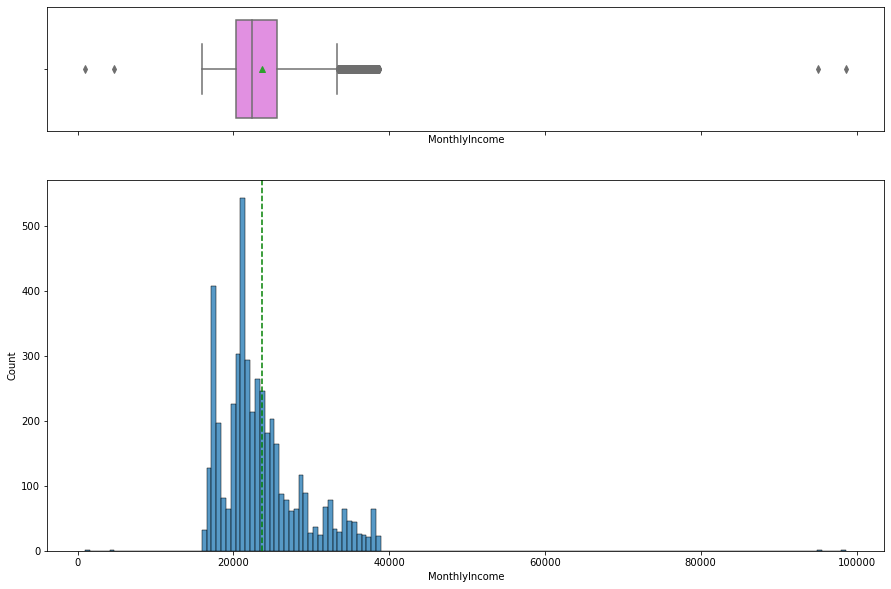

In [19]:
histogram_boxplot(df["MonthlyIncome"])

* As expected there are outliers in monthly income, majority of the customers are in the range of 15000 to 40000

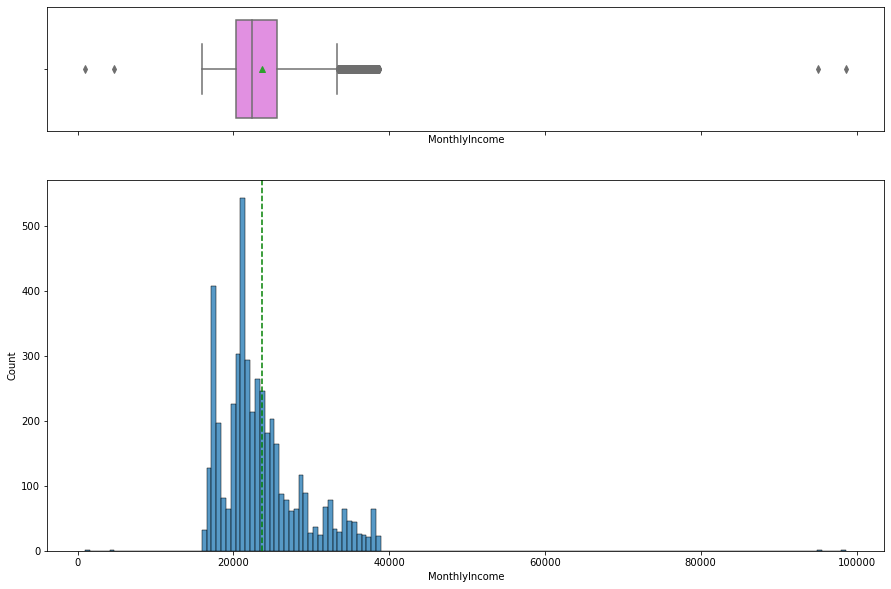

In [20]:
histogram_boxplot(df["MonthlyIncome"])

In [21]:
def perc_on_bar(feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    #Creating a countplot for the feature
    sns.set(rc={'figure.figsize':(15,7)})
    ax=sns.countplot(x=feature, data=df)
    
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.25 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 14) # annotate the percantage 
        
    plt.show() # show the plot

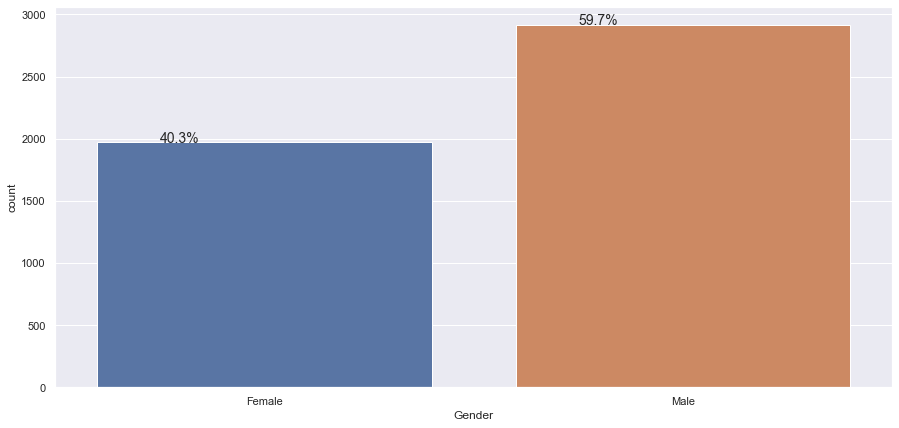

In [22]:
perc_on_bar(df['Gender'])

- Around 60% of the dataset is Male, though males might purchase travel package for themselves and their partner or family

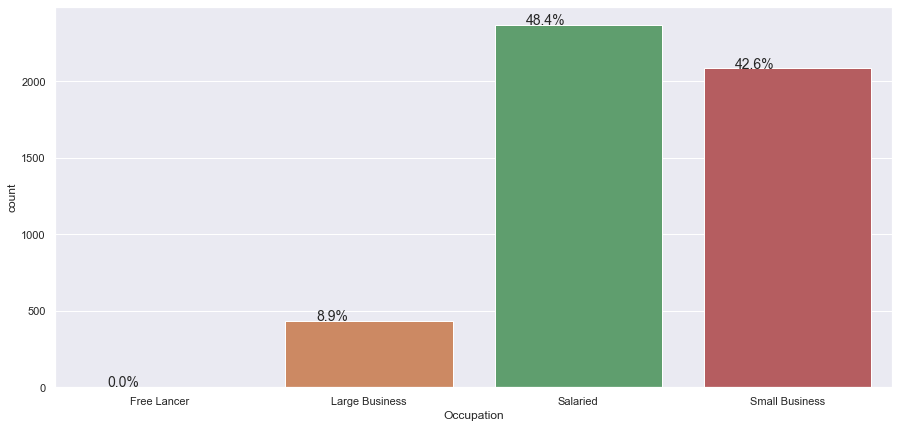

In [23]:
perc_on_bar(df['Occupation'])

- Majority of the customers in the dataset are Salaried or Small Business customers

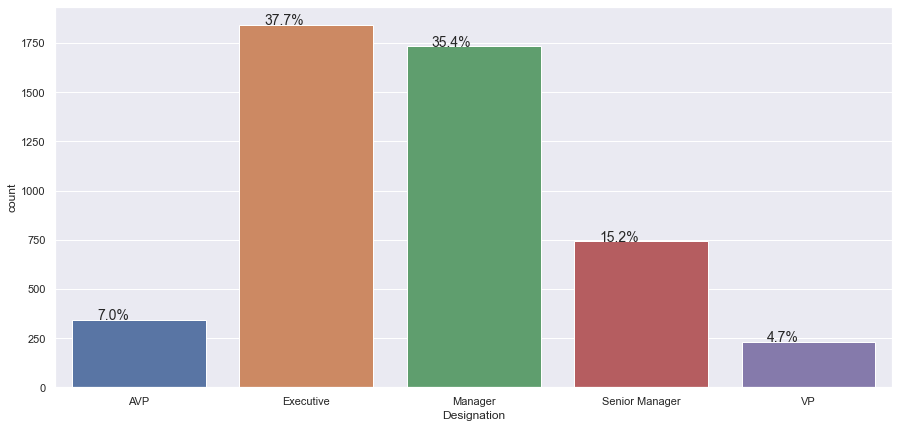

In [24]:
perc_on_bar(df['Designation'])

* Majority of customers are Executives and Managers

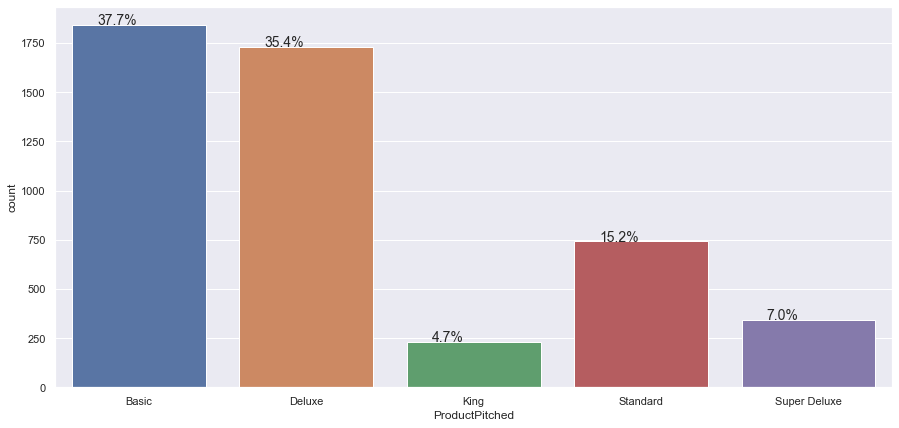

In [25]:
perc_on_bar(df['ProductPitched'])

* Majority of customers were either pitched Basic and Deluxe.
* Only 4.7% of the customers were pitched about King

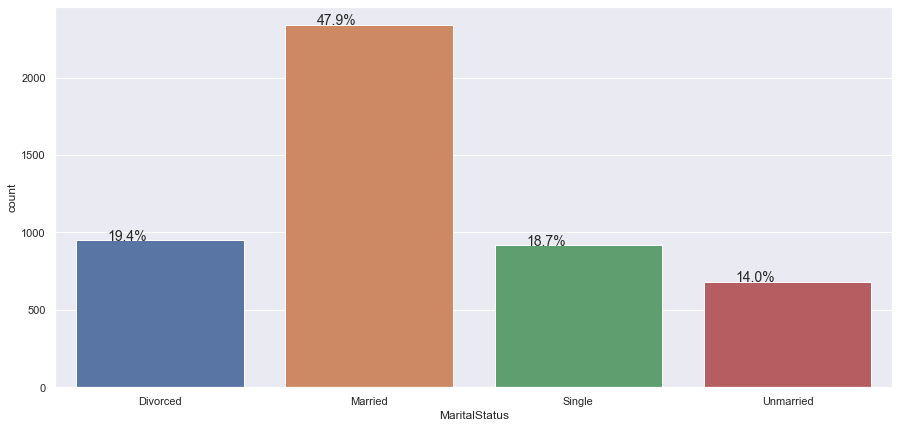

In [26]:
perc_on_bar(df['MaritalStatus'])

* 48% of married customers are there in the dataset

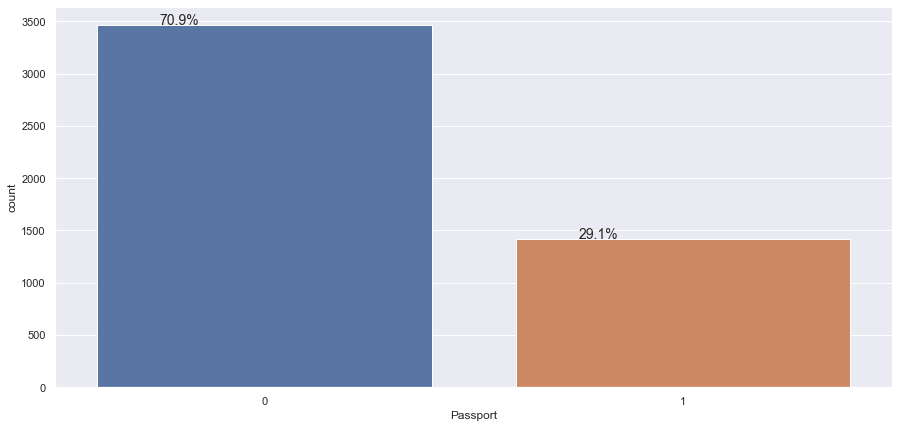

In [27]:
perc_on_bar(df['Passport'])

- 71% of the customers donot have a passport

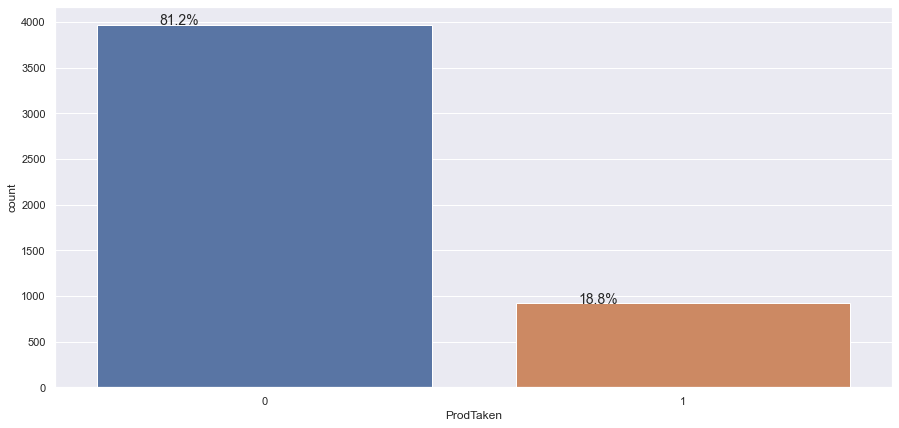

In [28]:
perc_on_bar(df['ProdTaken'])

* As mentioned in the context 19% of the customers purchased a Travel package

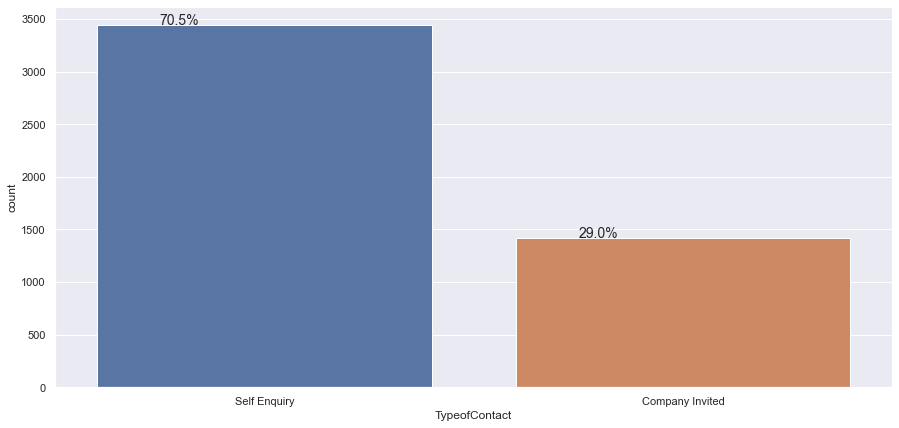

In [29]:
perc_on_bar(df['TypeofContact'])

* 70% of the customers were self enquiry

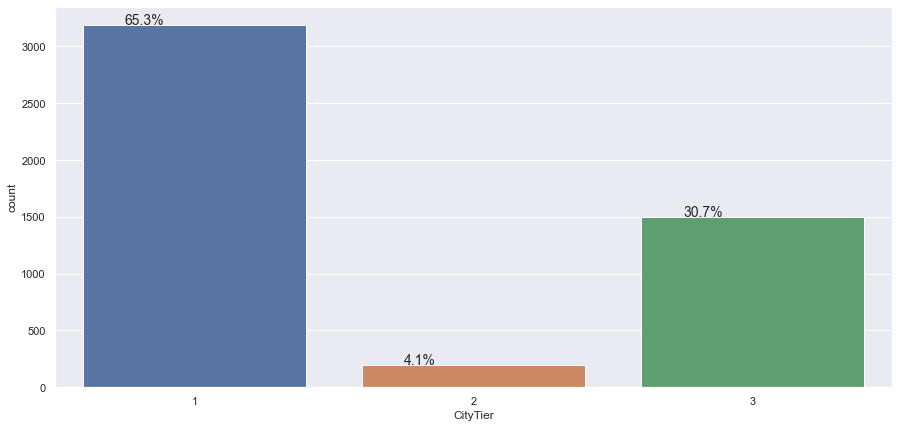

In [30]:
perc_on_bar(df['CityTier'])

* Majority of the customers are from Tier 1 cities, only 4.1% of the customers are from Tier 2 cities

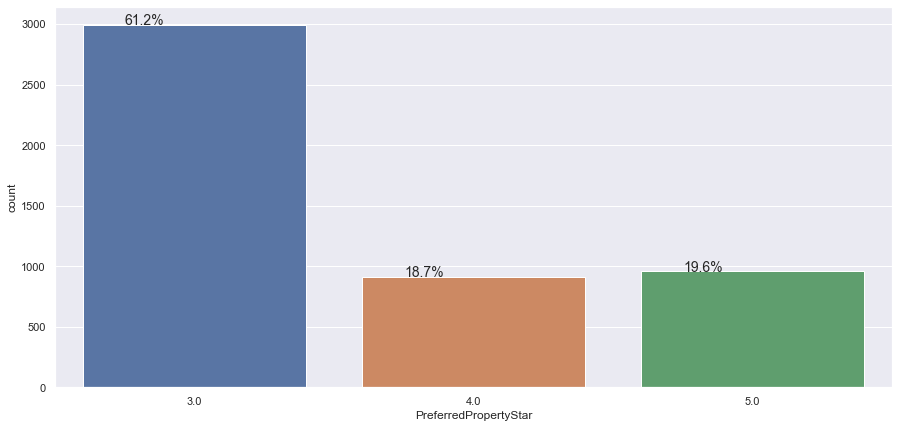

In [31]:
perc_on_bar(df['PreferredPropertyStar'])

* Around 61% of the customers prefer a 3.0 rated hotel property

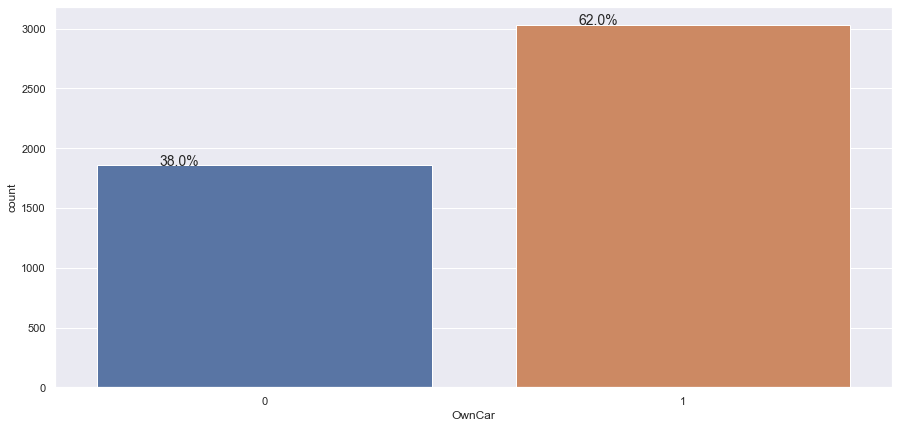

In [32]:
perc_on_bar(df['OwnCar'])

- 62% of the cutomers own a car

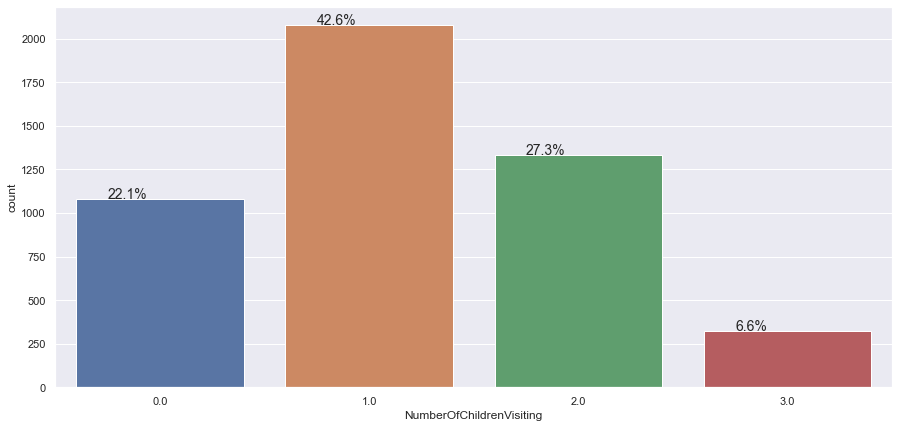

In [33]:
perc_on_bar(df['NumberOfChildrenVisiting'])

- There are 42.6% customers with 1 child

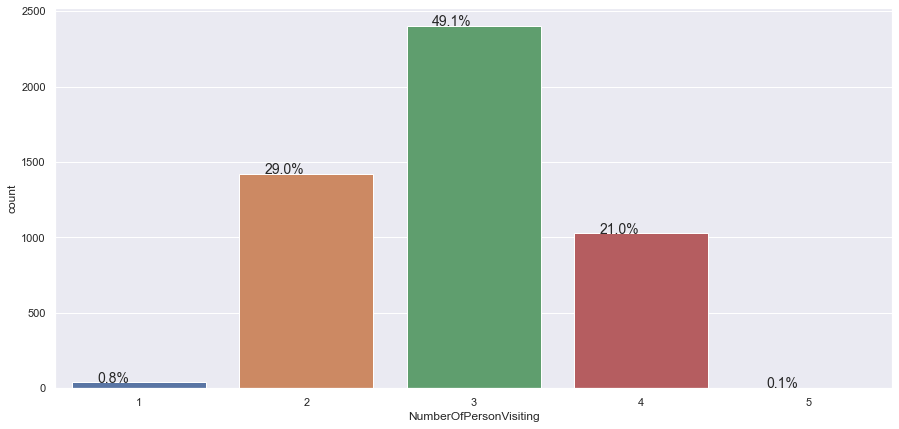

In [34]:
perc_on_bar(df['NumberOfPersonVisiting'])

* There might be a correlation between number of children visiting and number of persons visting, we will check it in heatmap 
* There are very few customers who travel with just 1 additional person or with 5 additional persons

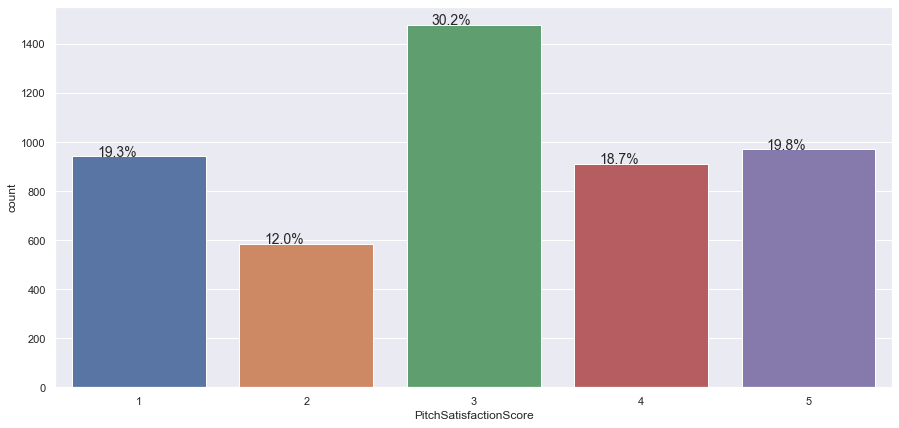

In [35]:
perc_on_bar(df['PitchSatisfactionScore'])

* 30.2% customers were moderately satified with the product pitched by the marketing team

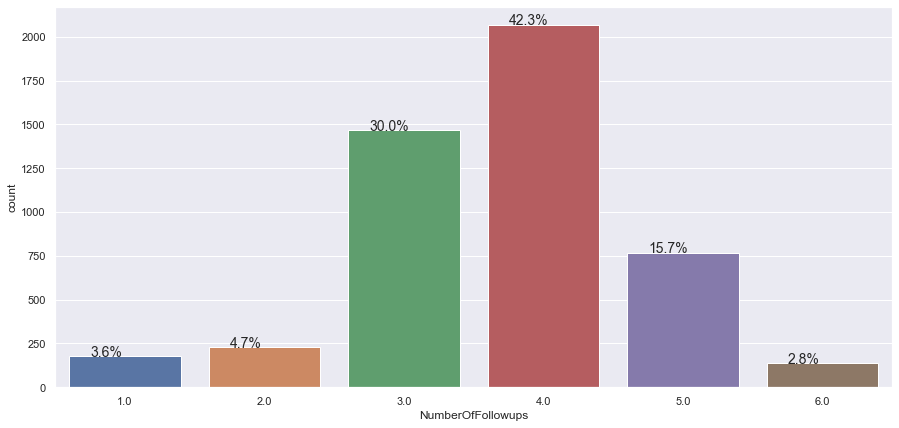

In [36]:
perc_on_bar(df['NumberOfFollowups'])

* 3-4 followups were done for most of the customers by the salesperson.

## Bivariate analysis

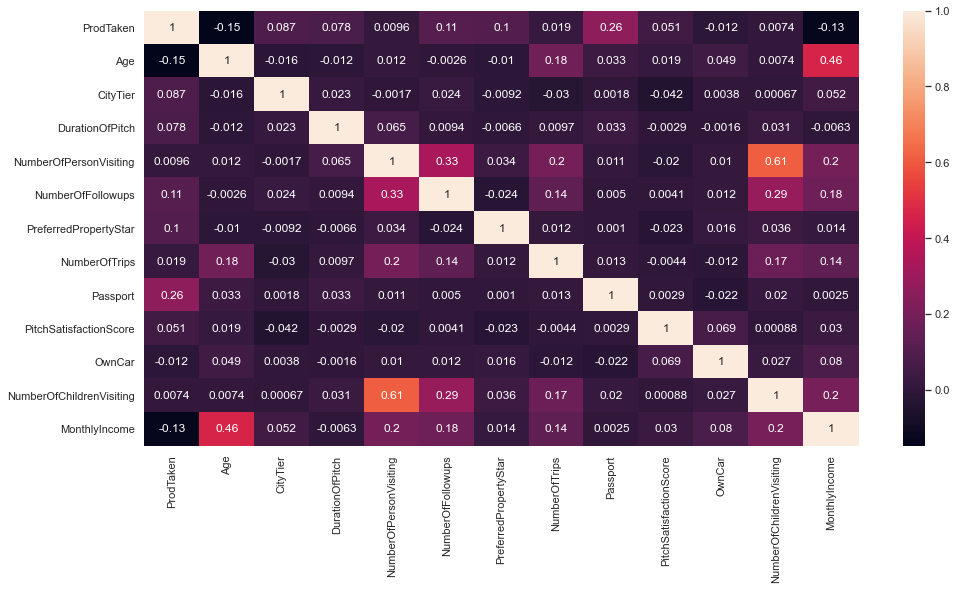

In [37]:
plt.figure(figsize = (16,8))
sns.heatmap(df.corr(), annot = True);
plt.savefig("heatmap.png")

Observations:
* Age and Monthly Income tend to have a positive relationship, as age increases monthly income of the person also increases
* Number of Children Visiting and Number of Persons visiting have a strong correlation which is very obvious.

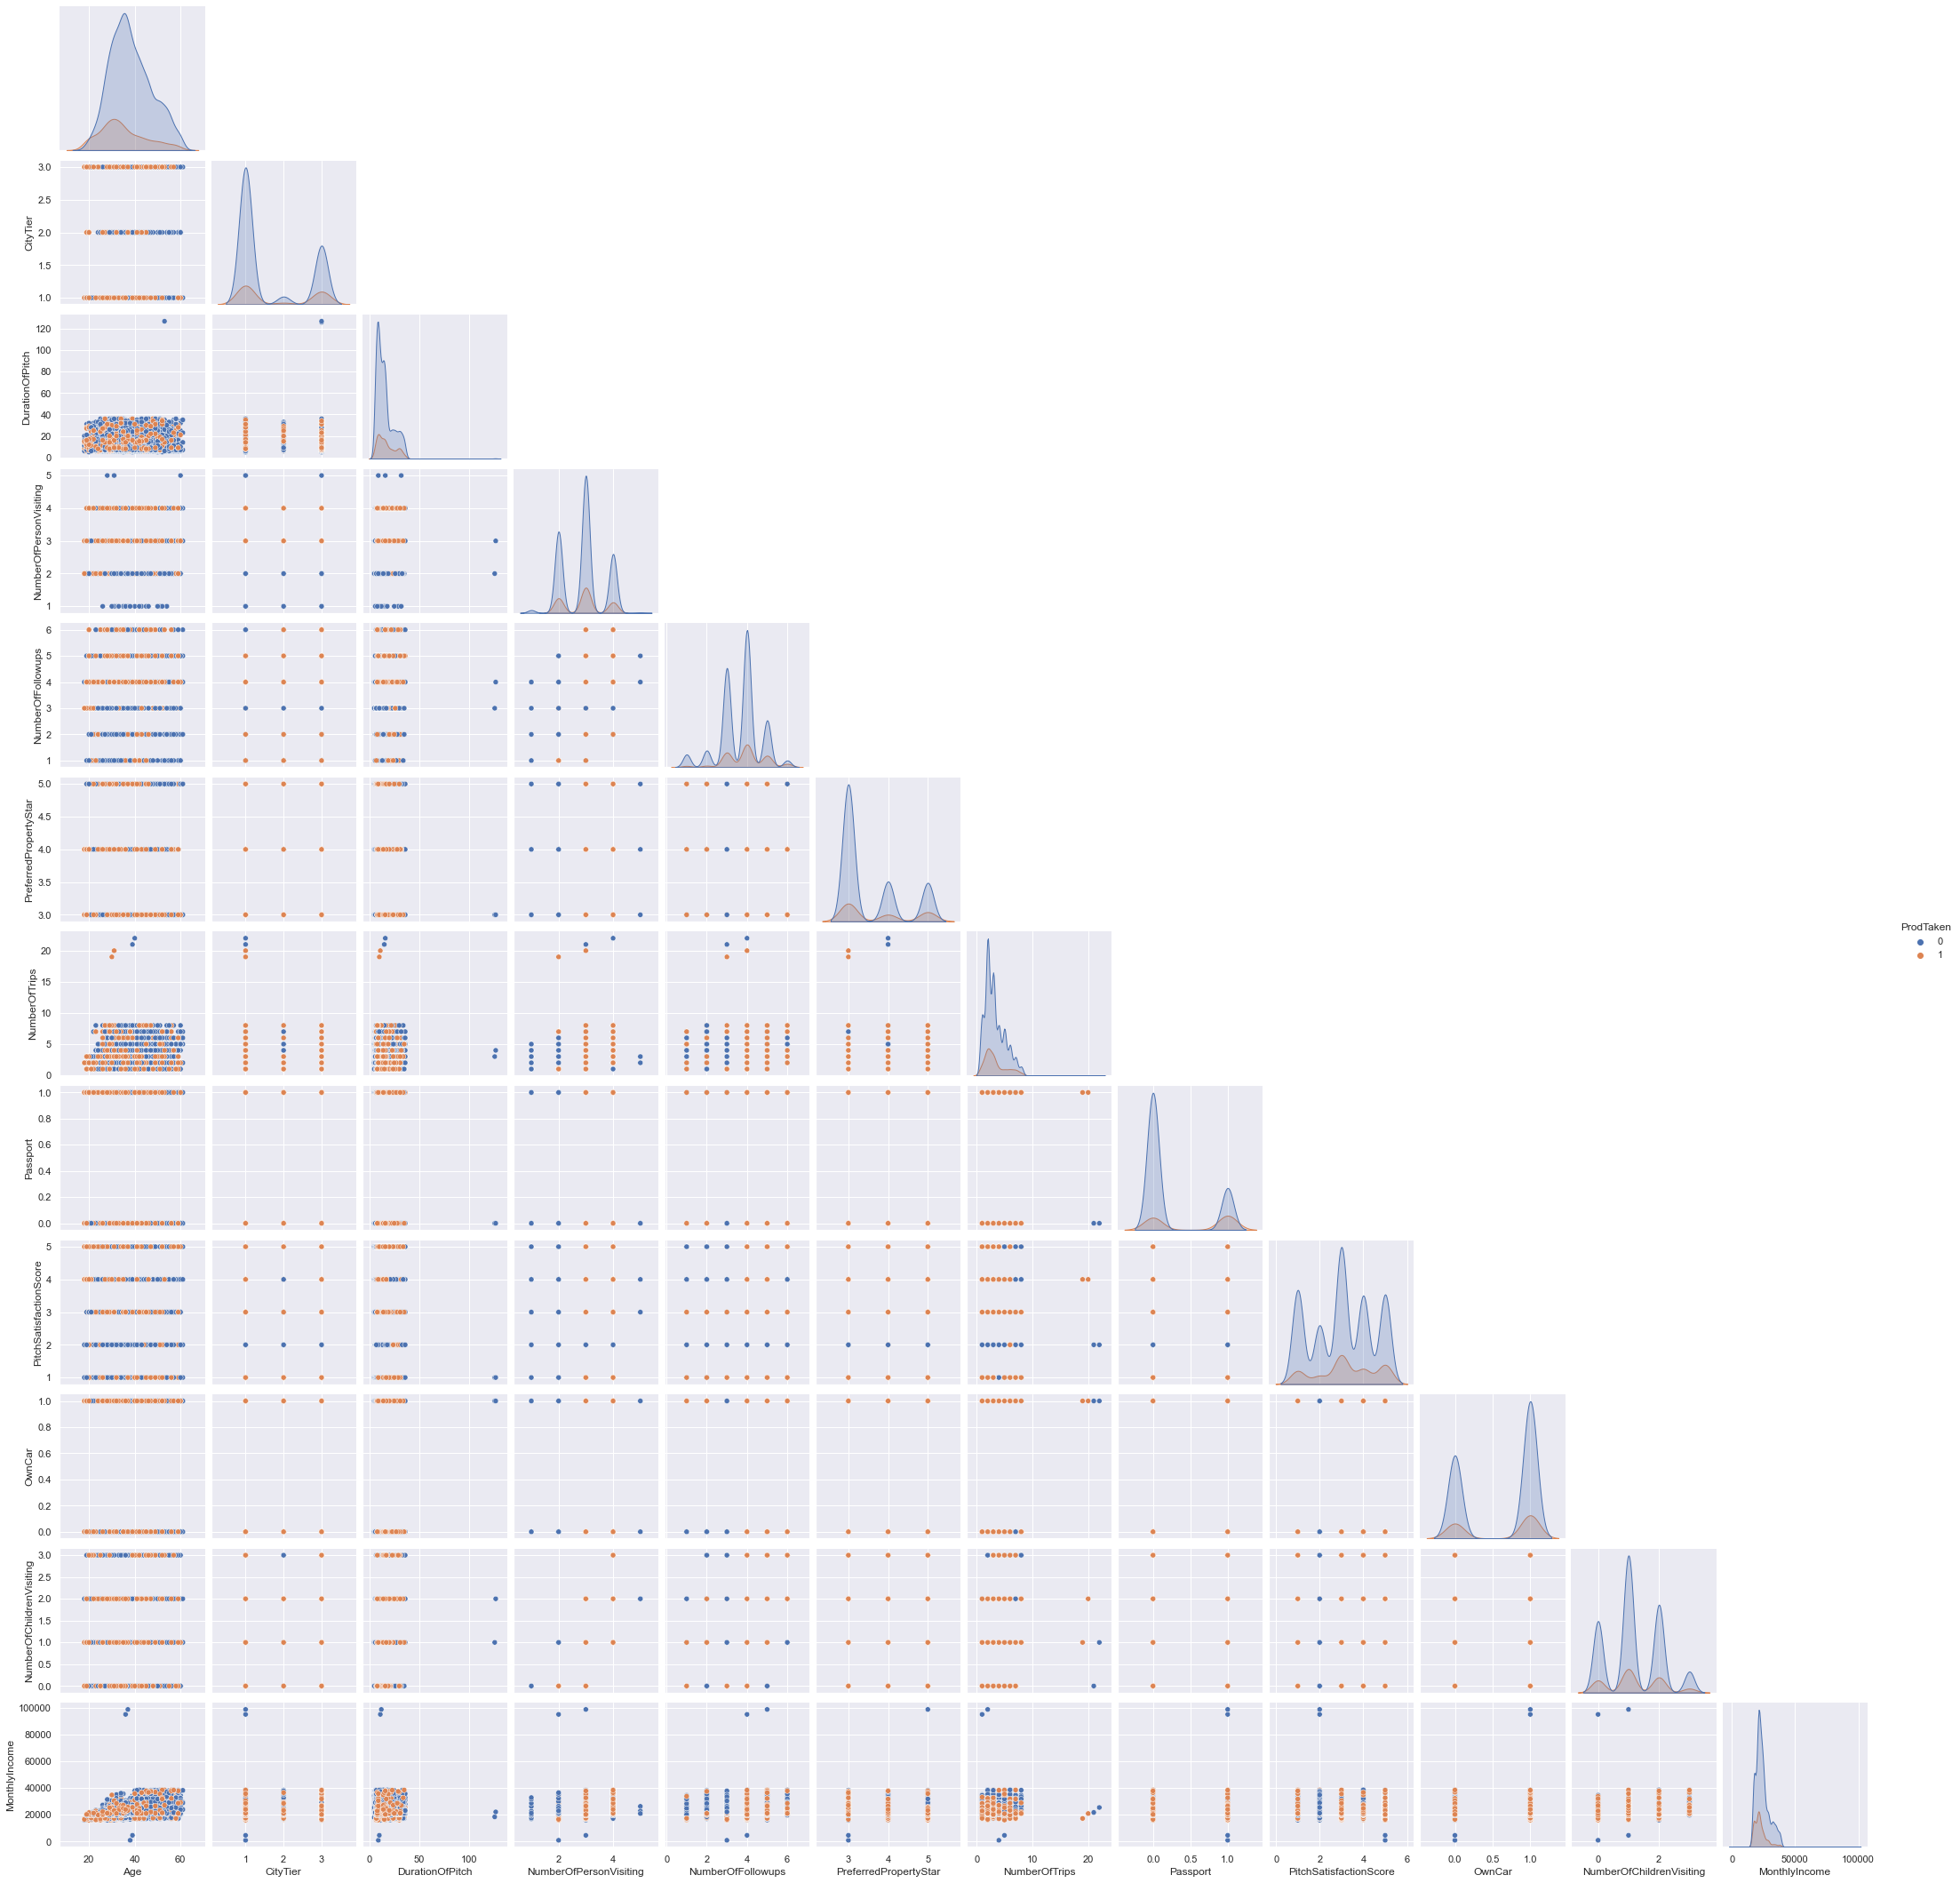

In [38]:
sns.pairplot(df,hue = "ProdTaken", corner = True);

### Analysing customer Profiles for each product

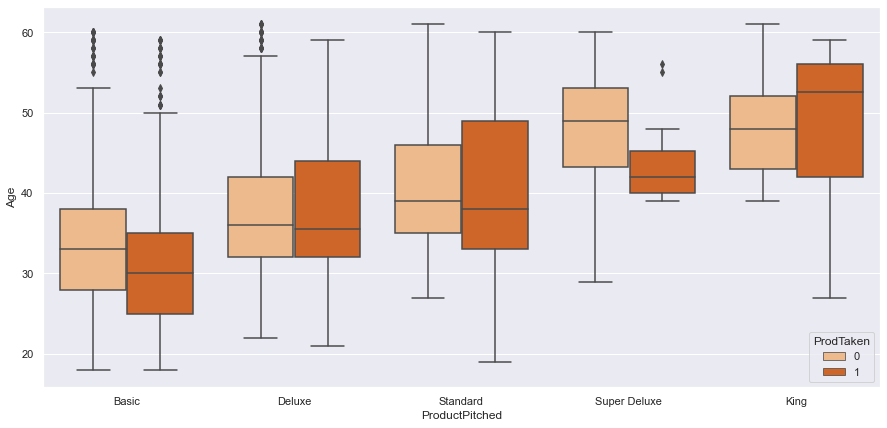

In [39]:
sns.boxplot(x = "ProductPitched", y = "Age",order = ["Basic","Deluxe","Standard", "Super Deluxe","King"],
            hue = "ProdTaken", data = df, palette = "Oranges");
plt.savefig("Age.png")

* Majority of customers who purchased Basic package are less than 38 years 
* Standard and Deluxe packages are very similar when compared by age of their customers with 30s and late 40s
* Super Deluxe packages is purchased by customers in their 40s and 50s
* King Package is famous with customers in their late 40s

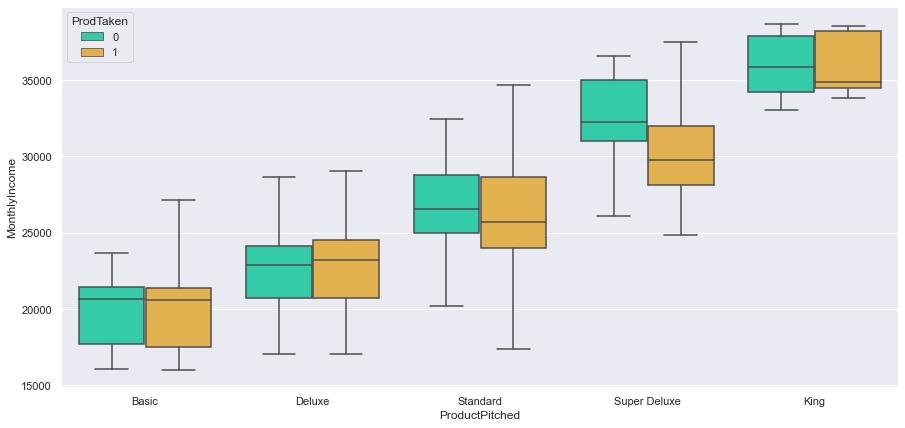

In [40]:
sns.boxplot(x = "ProductPitched", y = "MonthlyIncome",order = ["Basic","Deluxe","Standard", "Super Deluxe","King"],
            hue = "ProdTaken", data = df,showfliers = False, palette = "turbo");
plt.savefig("income.png")

* Looks like Basic > Deluxe > Standard > Super Deluxe > King
* King was purchased by customers with a monthly income of 30000 and greater with majority of the customers greater than 35000
* Basic was majorly purchased by customers with a monthly income between 15000 and 25000
* Deluxe package was mainly purchased by customers with  monthly income of 20000 and 30000
* Standard Package has the highest range of monthly income when compared to other packages
* Super Deluxe has the customers majorly with a monthly income higher than 25000

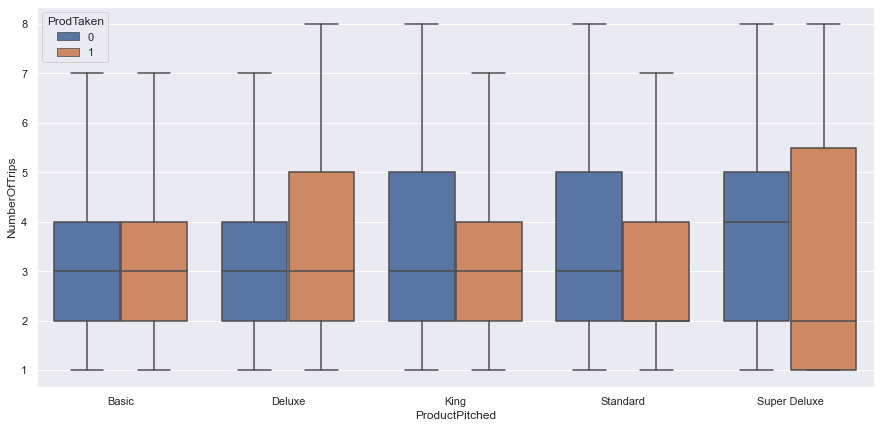

In [41]:
sns.boxplot(x = "ProductPitched", y = "NumberOfTrips", hue = "ProdTaken", data = df,showfliers = False);

There is no much pattern with number of trips customer takes to the Product they purchased

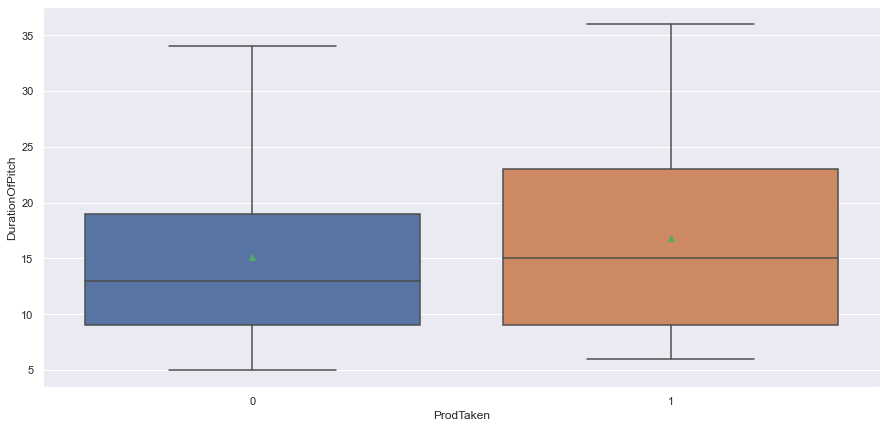

In [42]:
sns.boxplot(y = "DurationOfPitch", x = "ProdTaken", data = df, showfliers = False, showmeans = True);

* Average time taken by salesperson to pitch the product to the customer who has purchased is higher than that of one who didnot purchase

In [43]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,df['ProductPitched'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,df['ProductPitched'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

ProductPitched  Basic  Deluxe  King  Standard  Super Deluxe   All
MaritalStatus                                                    
Divorced          332     336    52       142            88   950
Married           816     852   126       380           166  2340
Single            511     221    52        50            82   916
Unmarried         183     323     0       170             6   682
All              1842    1732   230       742           342  4888
------------------------------------------------------------------------------------------------------------------------


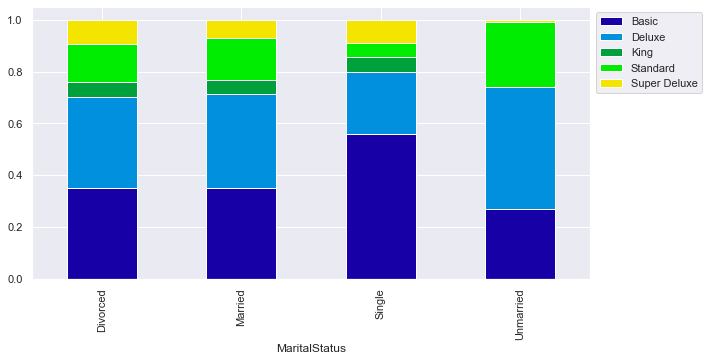

In [44]:
stacked_plot(df["MaritalStatus"])

* Majority of single customers were pitched Basic package
* Unmarried customers were most likely pitched basic and Deluxe packages, very few customers were pitched Super Deluxe and no unmarried customer was pitched King package, this could likely be due to limited samples
* Married customers were mostly pitched with Basic or Deluxe package
* Single and divorced had a equal likelihood of pitching King package

ProductPitched   Basic  Deluxe  King  Standard  Super Deluxe   All
TypeofContact                                                     
Company Invited    516     541    48       218            96  1419
Self Enquiry      1316    1176   182       524           246  3444
All               1832    1717   230       742           342  4863
------------------------------------------------------------------------------------------------------------------------


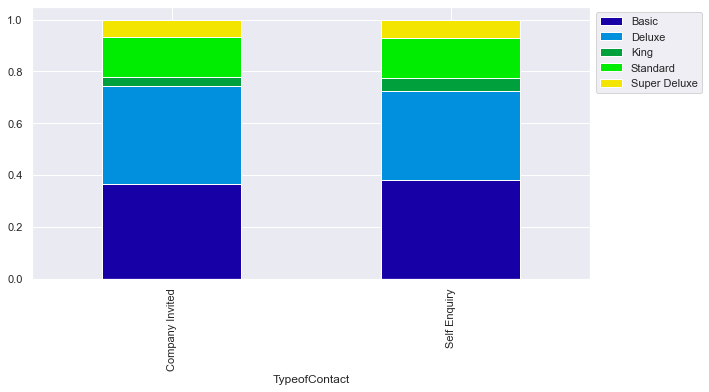

In [45]:
stacked_plot(df["TypeofContact"])

* King was pitched more to self enquiry customers

ProductPitched  Basic  Deluxe  King  Standard  Super Deluxe   All
CityTier                                                         
1                1466     908   168       436           212  3190
2                 108      40    22        18            10   198
3                 268     784    40       288           120  1500
All              1842    1732   230       742           342  4888
------------------------------------------------------------------------------------------------------------------------


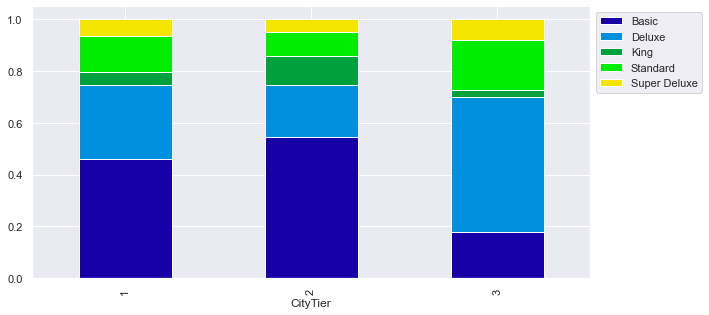

In [46]:
stacked_plot(df["CityTier"])

* Customers from city 1 and 3 have a greater samples than city tier 2
* Majority of customers from city tier 1 were pitched basic package
* Customers from city tier 3 were pitched packages higher than basic

ProductPitched  Basic  Deluxe  King  Standard  Super Deluxe   All
Gender                                                           
Female            680     724    82       326           160  1972
Male             1162    1008   148       416           182  2916
All              1842    1732   230       742           342  4888
------------------------------------------------------------------------------------------------------------------------


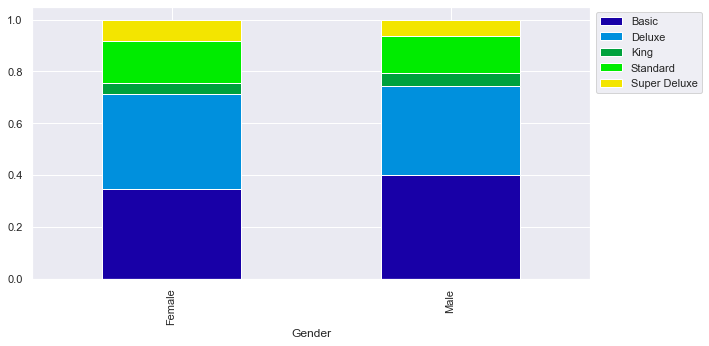

In [47]:
stacked_plot(df["Gender"])

ProductPitched          Basic  Deluxe  King  Standard  Super Deluxe   All
NumberOfPersonVisiting                                                   
1                           9      17     0         7             6    39
2                         517     511    75       209           106  1418
3                         911     848   115       363           165  2402
4                         404     355    40       162            65  1026
5                           1       1     0         1             0     3
All                      1842    1732   230       742           342  4888
------------------------------------------------------------------------------------------------------------------------


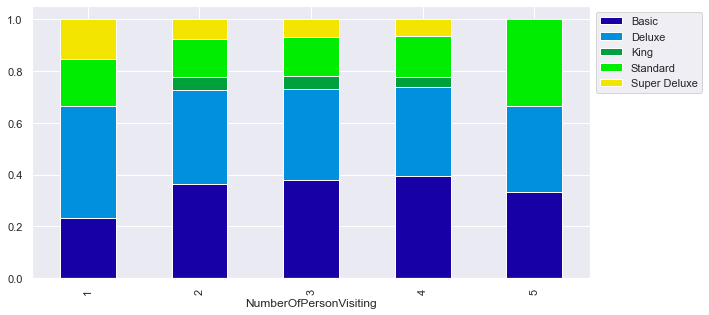

In [48]:
stacked_plot(df["NumberOfPersonVisiting"])

* King and Super deluxe was not pitched to customers with number of persons visiting 1 or 5, that might be due to limited samples in the data

ProductPitched  Basic  Deluxe  King  Standard  Super Deluxe   All
ProdTaken                                                        
0                1290    1528   210       618           322  3968
1                 552     204    20       124            20   920
All              1842    1732   230       742           342  4888
------------------------------------------------------------------------------------------------------------------------


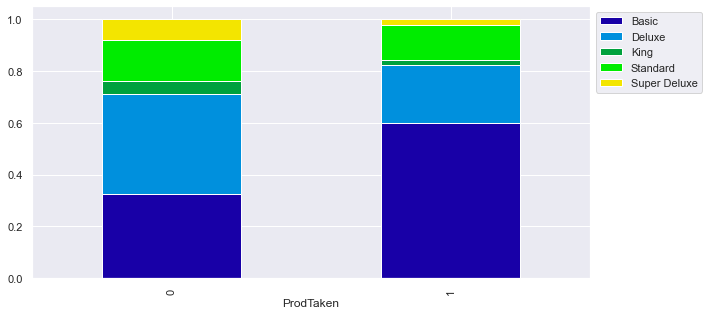

In [49]:
stacked_plot(df["ProdTaken"])

* Majority of customers who purchased a travel package took Basic package
* As the Product range increased customers who purchased the Product was reduced

ProductPitched  Basic  Deluxe  King  Standard  Super Deluxe   All
Occupation                                                       
Free Lancer         2       0     0         0             0     2
Large Business    196     124    12        84            18   434
Salaried          924     818   114       338           174  2368
Small Business    720     790   104       320           150  2084
All              1842    1732   230       742           342  4888
------------------------------------------------------------------------------------------------------------------------


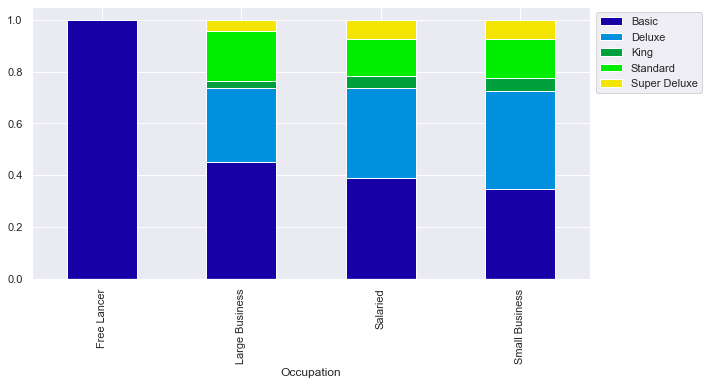

In [50]:
stacked_plot(df["Occupation"])

* Most of the Small Business customers were pitched Deluxe package
* Salaried and Small business customers had similar likelihood in pitching a Product

ProductPitched         Basic  Deluxe  King  Standard  Super Deluxe   All
PreferredPropertyStar                                                   
3.0                     1118    1090   137       436           212  2993
4.0                      368     312    41       130            62   913
5.0                      355     329    29       175            68   956
All                     1841    1731   207       741           342  4862
------------------------------------------------------------------------------------------------------------------------


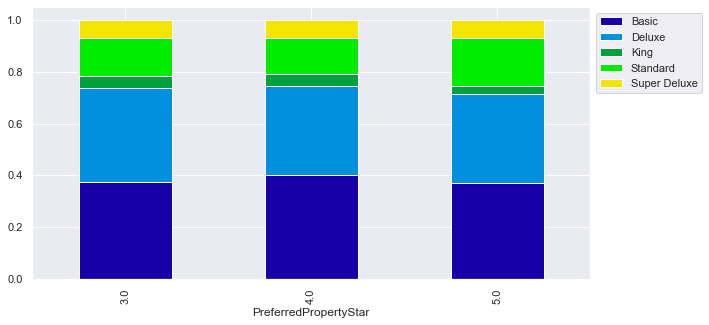

In [51]:
stacked_plot(df["PreferredPropertyStar"])

* Customers who preferred 3 star properties are highest when compared to other
* Customers who preferred 5 star properties were not likely pitched King Product

ProductPitched  Basic  Deluxe  King  Standard  Super Deluxe   All
Passport                                                         
0                1274    1252   170       532           238  3466
1                 568     480    60       210           104  1422
All              1842    1732   230       742           342  4888
------------------------------------------------------------------------------------------------------------------------


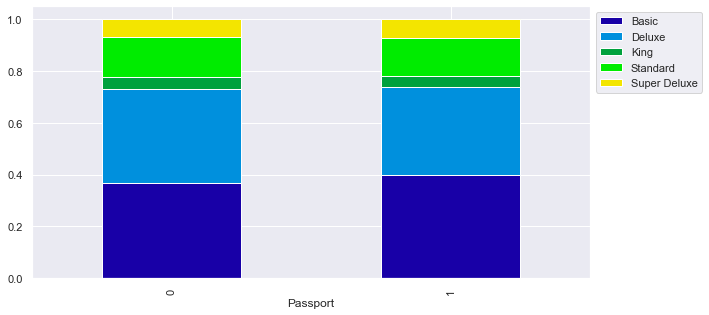

In [52]:
stacked_plot(df["Passport"])

* Basic customers were more likely to have a passport.
* Other packages tend to have equal proportions

ProductPitched     Basic  Deluxe  King  Standard  Super Deluxe   All
NumberOfFollowups                                                   
1.0                   72      65     4        17            18   176
2.0                   92      86     6        23            22   229
3.0                  556     509    75       221           105  1466
4.0                  767     724   100       333           144  2068
5.0                  288     263    36       133            48   768
6.0                   54      53     9        15             5   136
All                 1829    1700   230       742           342  4843
------------------------------------------------------------------------------------------------------------------------


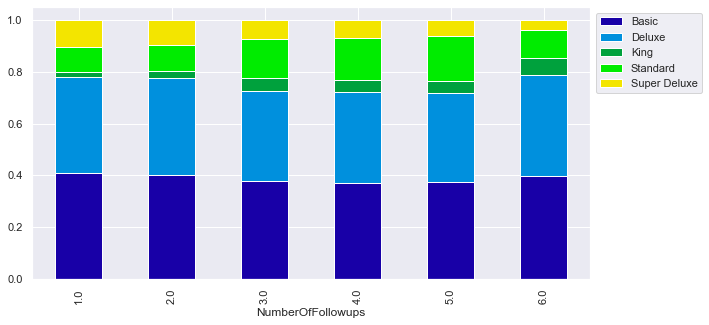

In [53]:
stacked_plot(df["NumberOfFollowups"])

* Majority of customers needed 3 - 4 followups. This would make more meaning when we check with customers who have purchased a product

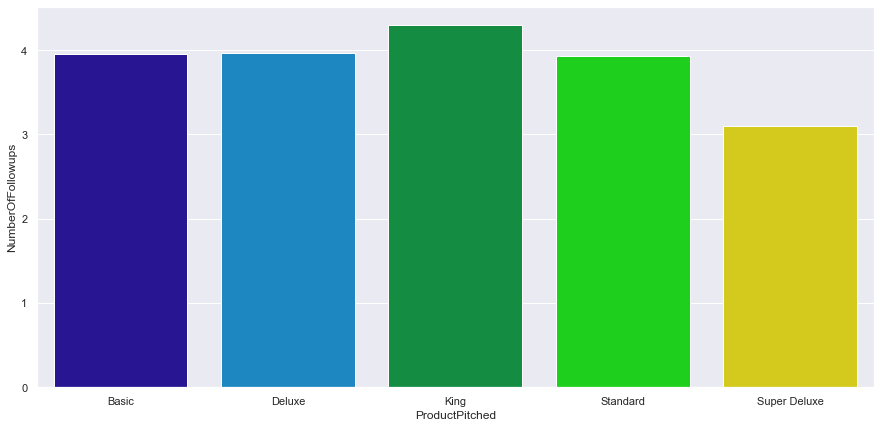

In [54]:
taken = df[df["ProdTaken"] == 1]
sns.barplot(x = "ProductPitched", y = "NumberOfFollowups", data = taken, ci = False);

* On an average Basic, Deluxe and Standard required 4 followups
* Super Deluxe required only 3 followups on average for a customer to purchase it
* King required more than 5 followups for a customer to purchase the product which should be fine as this seems like a highly paid package
* Less number of followups with Super deluxe also indicates the number of followups would increase the sale of a product

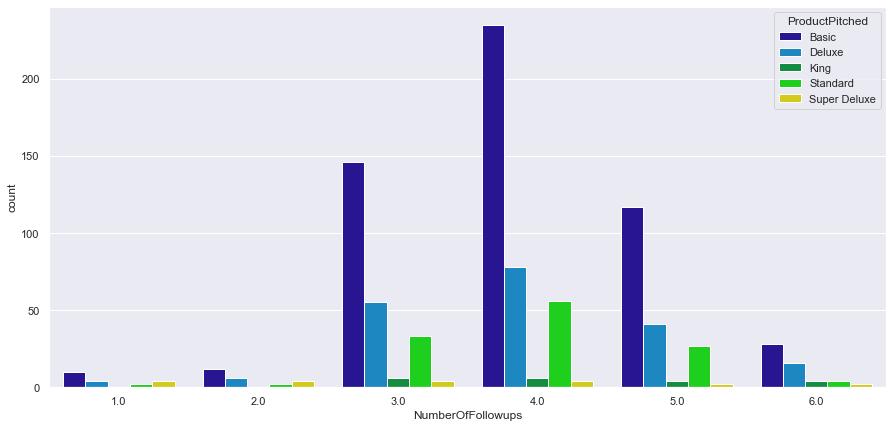

In [55]:
sns.countplot(x= "NumberOfFollowups", hue = "ProductPitched", data = taken);

* Customer purchasing the package when a salesperson follow-ups 3-4 times has a higher likelihood than less than 3 times

<AxesSubplot:xlabel='Designation', ylabel='count'>

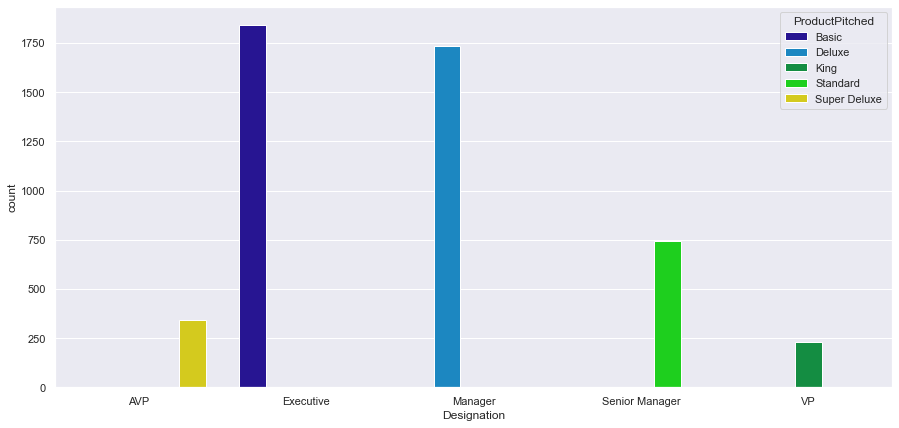

In [56]:
sns.countplot(x = "Designation", hue = "ProductPitched", data = df)

* This is pretty self explanatory, where customers were pitched a product based on their designation, this shows the highest correlation with each other.

ProductPitched          Basic  Deluxe  King  Standard  Super Deluxe   All
PitchSatisfactionScore                                                   
1                         358     352    40       146            46   942
2                         204     220    34       102            26   586
3                         550     552    48       202           126  1478
4                         390     280    50       144            48   912
5                         340     328    58       148            96   970
All                      1842    1732   230       742           342  4888
------------------------------------------------------------------------------------------------------------------------


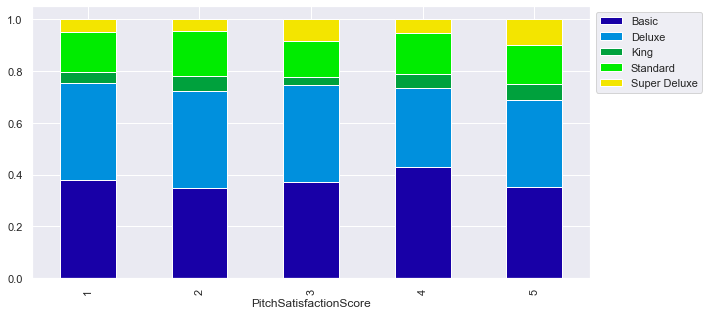

In [57]:
stacked_plot(df["PitchSatisfactionScore"])

* There doesnot seem to have a pattern in pitch perfection score

ProductPitched  Basic  Deluxe  King  Standard  Super Deluxe   All
OwnCar                                                           
0                 758     674    64       258           102  1856
1                1084    1058   166       484           240  3032
All              1842    1732   230       742           342  4888
------------------------------------------------------------------------------------------------------------------------


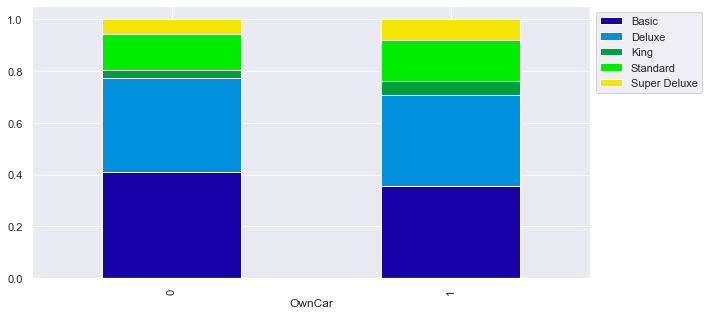

In [58]:
stacked_plot(df["OwnCar"])

* Majority of customers without a car were pitched Basic package

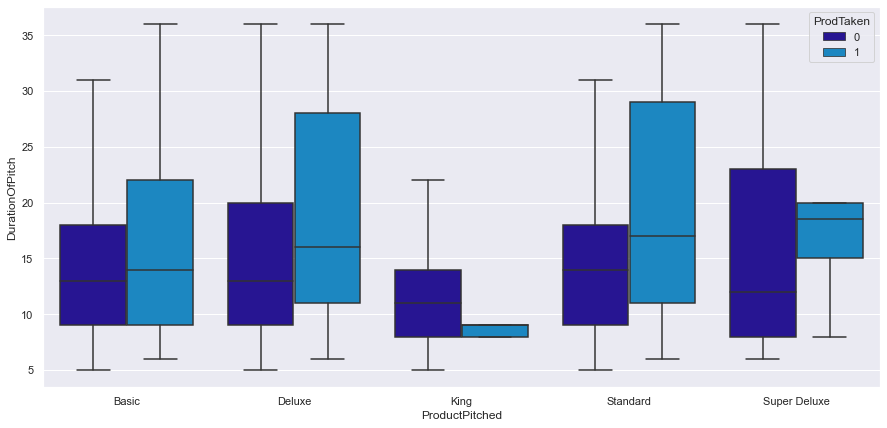

In [59]:
sns.boxplot(x = "ProductPitched", y = "DurationOfPitch", data = df, hue = "ProdTaken", showfliers = False);

* Standard and Deluxe packages tend to take longer time to Pitch. This features makes more sense if the customer would have purchased the Product, we will take a look for the customers who have purchased it.

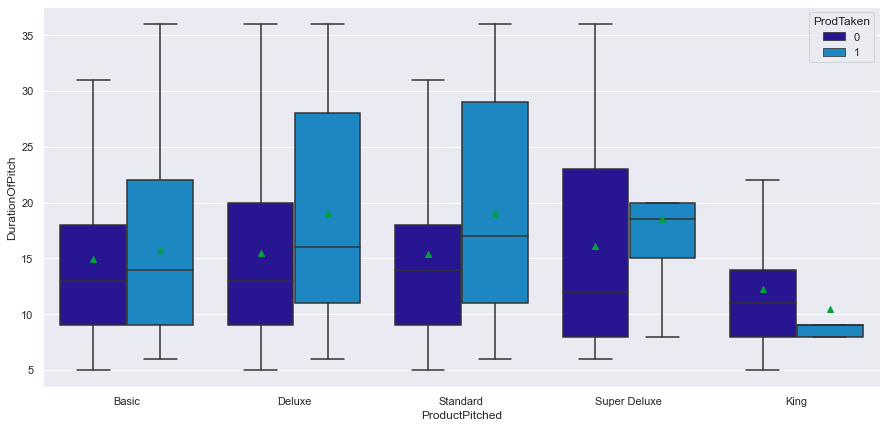

In [60]:
sns.boxplot(x = "ProductPitched", y = "DurationOfPitch", order =["Basic", "Deluxe", "Standard", "Super Deluxe", "King"]
            , data = df,showfliers = False, showmeans = True,hue = "ProdTaken");
plt.savefig("Duration.png")

* Majority of customers who purchased deluxe or standard package took close to 30 minutes.
* Mean duration for a customer to purchase Basic travel package is around 15 minutes
* Mean duration a salesperson pitched Deluxe, Standard and Super deluxe is similar around 20 minutes
* Commenting on duration of pitch for King would not be correct as the number of customers who bought King package is very small

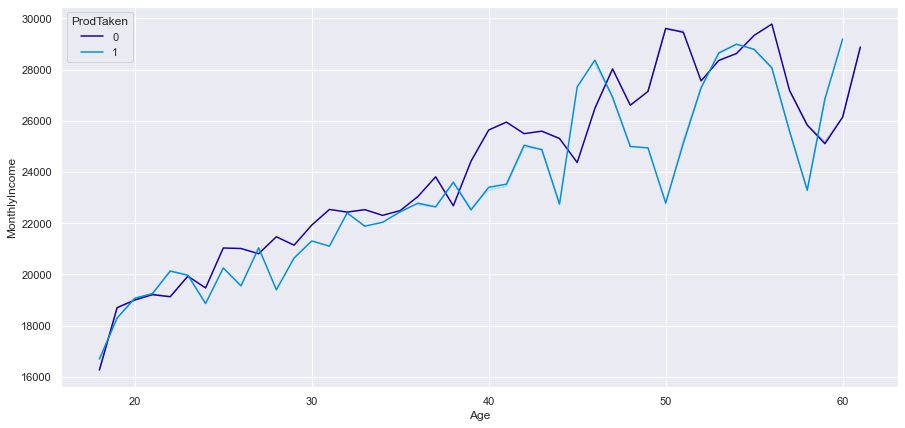

In [61]:
sns.lineplot(x = "Age", y = "MonthlyIncome", data = df, hue = "ProdTaken", ci = False);
plt.savefig("agemonthlyincome.png")

* This clearly shows the correlation of Age and monthly income of the customer, the likelihood of purchasing a package is not that clearly shown in the graph

<b> Customer Conversion Rate </b> - How likely a customer is to buy the Product that is pitched

ProdTaken          0    1   All
ProductPitched                 
Basic           1290  552  1842
Deluxe          1528  204  1732
King             210   20   230
Standard         618  124   742
Super Deluxe     322   20   342
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


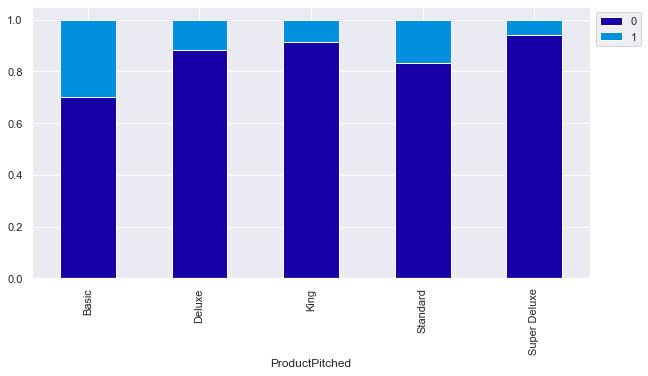

In [62]:
sns.set(palette='nipy_spectral')
tab1 = pd.crosstab(df["ProductPitched"],df['ProdTaken'],margins=True)
print(tab1)
print('-'*120)
tab = pd.crosstab(df["ProductPitched"],df['ProdTaken'],normalize='index')
tab.plot(kind='bar',stacked=True,figsize=(10,5))
plt.legend(loc='lower left', frameon=False)
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

* The conversion rate for Basic is higher than other products
* Order of conversion rate being Basic, Standard, Deluxe, King and Super Deluxe being the least converted

ProdTaken     0    1   All
Passport                  
0          3040  426  3466
1           928  494  1422
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


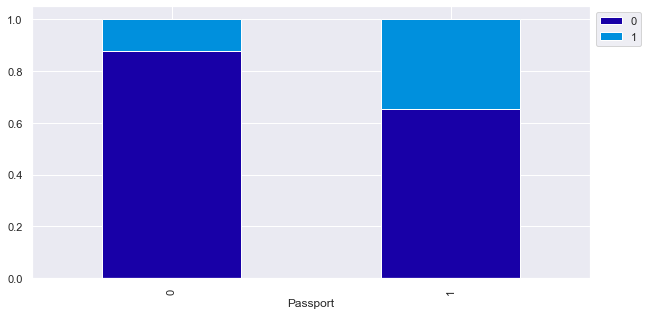

In [63]:
sns.set(palette='nipy_spectral')
tab1 = pd.crosstab(df["Passport"],df['ProdTaken'],margins=True)
print(tab1)
print('-'*120)
tab = pd.crosstab(df["Passport"],df['ProdTaken'],normalize='index')
tab.plot(kind='bar',stacked=True,figsize=(10,5))
plt.legend(loc='lower left', frameon=False)
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

## Customer Profiling:

In [64]:
df[(df["ProdTaken"]==1) & (df["ProductPitched"]=="Basic")].describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ProdTaken,552,NaN,NaN,NaN,1,0,1,1,1,1,1
Age,515,NaN,NaN,NaN,31.2893,9.07083,18,25,30,35,59
TypeofContact,549,2,Self Enquiry,355,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,552,NaN,NaN,NaN,1.51087,0.832566,1,1,1,2,3
DurationOfPitch,532,NaN,NaN,NaN,15.7914,7.90693,6,9,14,22,36
Occupation,552,4,Salaried,260,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,552,2,Male,344,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,552,NaN,NaN,NaN,2.9058,0.701439,2,2,3,3,4
NumberOfFollowups,548,NaN,NaN,NaN,3.95073,0.967166,1,3,4,5,6
ProductPitched,552,1,Basic,552,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
df[(df["ProdTaken"]==1) & (df["ProductPitched"]=="Deluxe")].describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ProdTaken,204,NaN,NaN,NaN,1,0,1,1,1,1,1
Age,198,NaN,NaN,NaN,37.6414,8.46958,21,32,35.5,44,59
TypeofContact,204,2,Self Enquiry,136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,204,NaN,NaN,NaN,2.41176,0.913532,1,1,3,3,3
DurationOfPitch,180,NaN,NaN,NaN,19.1,9.22718,6,11,16,28,36
Occupation,204,3,Small Business,108,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,204,2,Male,134,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,204,NaN,NaN,NaN,2.95098,0.707141,2,2,3,3,4
NumberOfFollowups,200,NaN,NaN,NaN,3.97,1.05101,1,3,4,5,6
ProductPitched,204,1,Deluxe,204,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
df[(df["ProdTaken"]==1) & (df["ProductPitched"]=="Standard")].describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ProdTaken,124,NaN,NaN,NaN,1,0,1,1,1,1,1
Age,123,NaN,NaN,NaN,41.0081,9.8767,19,33,38,49,60
TypeofContact,124,2,Self Enquiry,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,124,NaN,NaN,NaN,2.09677,0.966255,1,1,3,3,3
DurationOfPitch,123,NaN,NaN,NaN,19.065,9.04881,6,11,17,29,36
Occupation,124,3,Small Business,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,124,2,Male,76,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,124,NaN,NaN,NaN,2.96774,0.709236,2,2,3,3,4
NumberOfFollowups,124,NaN,NaN,NaN,3.93548,0.908335,1,3,4,4.25,6
ProductPitched,124,1,Standard,124,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
df[(df["ProdTaken"]==1) & (df["ProductPitched"]=="Super Deluxe")].describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ProdTaken,20,NaN,NaN,NaN,1,0,1,1,1,1,1
Age,20,NaN,NaN,NaN,43.5,4.83953,39,40,42,45.25,56
TypeofContact,20,2,Company Invited,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,20,NaN,NaN,NaN,2.6,0.820783,1,3,3,3,3
DurationOfPitch,20,NaN,NaN,NaN,18.5,7.33054,8,15,18.5,20,31
Occupation,20,2,Salaried,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,20,2,Male,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,20,NaN,NaN,NaN,2.7,0.656947,2,2,3,3,4
NumberOfFollowups,20,NaN,NaN,NaN,3.1,1.61897,1,2,3,4,6
ProductPitched,20,1,Super Deluxe,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
df[(df["ProdTaken"]==1) & (df["ProductPitched"]=="King")].describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ProdTaken,20,NaN,NaN,NaN,1,0,1,1,1,1,1
Age,20,NaN,NaN,NaN,48.9,9.61851,27,42,52.5,56,59
TypeofContact,20,1,Self Enquiry,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,20,NaN,NaN,NaN,1.8,1.00525,1,1,1,3,3
DurationOfPitch,20,NaN,NaN,NaN,10.5,4.13585,8,8,9,9,19
Occupation,20,3,Small Business,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,20,2,Female,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,20,NaN,NaN,NaN,2.9,0.718185,2,2,3,3,4
NumberOfFollowups,20,NaN,NaN,NaN,4.3,1.12858,3,3,4,5,6
ProductPitched,20,1,King,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Basic Package**
1. Majority of customers whose age is between 20-40, with a monthly income of 15000 - 25000.
2. Single and Married customers were more inclined
3. Customers from City Tier 1 were highly likely to purchase this package
4. Majority of customers with 3 or less number of persons visiting with them had a higher likelihood to purchase this package
5. Any customer with a designation of executive was pitched basic package which will not be the case in real-life scenario
6. Free Lancers or lower earning customers can be targeted

**Deluxe Package**
1. In terms of age Deluxe and standard tend to have attracted similar age groups of 30 - 40
2. Customers with a monthly income from 20000 - 28000 were more likely to buy this package
3. Married customers with 1 or 2 children were more inclined to buy this package
4. Any customer with a designation of Manager has bought the product


**Standard Package**
1. Customer whose age is around 30-40 with a monthly income between 20000 - 30000
2. Married customers were highly likely to buy this package
3. Customers from city tier 1 and 2 are more likely to buy this package 
4. More than 50% of the customers who bought the package donot have a passport
5. Divorced and unmarried customers had a more likelihood of purchasing this product


**Super Deluxe Package**
1. Majority of customers around the age of 40 - 50 are more likely to buy this package
2. Salaried customers with a monthly income of 25000 - 35000 were more intrested to buy the product
3. Customer without a car will not be intrested in this product.
4. More than 50% of the customers have a passport
5. Divorced customers didnot show much intrest in purchasing this package
6. Population is very less when compared to other packages , will be tough on commenting on some features such as city tier, number of people visiting

**King Package**
1. Customers around the age of 45-60 were more likely to buy the product
2. This seems to be a higher priced product as customers with a montly salary of 35000 - 40000 were more likely to purchase the product
3. This package is not that famous among unmarried people
4. Duration of the pitch can be more for this product, as this is a higher priced product
5. Female population for this product is higher, but we cannot pinpoint that a female will be more likely to purchase this product.

### Check Outliers and Treating them

In [69]:
Q1 = df.quantile(0.25)             #To find the 25th percentile and 75th percentile.
Q3 = df.quantile(0.75)

IQR = Q3 - Q1                           #Inter Quantile Range (75th perentile - 25th percentile)

lower=Q1-1.5*IQR                        #Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper=Q3+1.5*IQR

In [70]:
((df.select_dtypes(include=['float64','int64'])<lower) | (df.select_dtypes(include=['float64','int64'])>upper)).sum()/len(df)*100

ProdTaken                   18.821604
Age                          0.000000
CityTier                     0.000000
DurationOfPitch              0.040917
NumberOfPersonVisiting       0.061375
NumberOfFollowups            6.382979
PreferredPropertyStar        0.000000
NumberOfTrips                2.229951
Passport                     0.000000
PitchSatisfactionScore       0.000000
OwnCar                       0.000000
NumberOfChildrenVisiting     0.000000
MonthlyIncome                7.058101
dtype: float64

In [71]:
df.sort_values(by =["DurationOfPitch"],ascending = False).head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
3878,0,53.0,Company Invited,3,127.0,Salaried,Male,3,4.0,Basic,3.0,Married,4.0,0,1,1,2.0,Executive,22160.0
1434,0,NaN,Company Invited,3,126.0,Salaried,Male,2,3.0,Basic,3.0,Married,3.0,0,1,1,1.0,Executive,18482.0
2796,0,49.0,Self Enquiry,3,36.0,Small Business,Female,4,4.0,Standard,3.0,Divorced,5.0,0,4,0,1.0,Senior Manager,31182.0
2868,0,58.0,Self Enquiry,3,36.0,Small Business,Male,3,5.0,Super Deluxe,3.0,Married,5.0,0,3,0,1.0,AVP,32796.0
2648,1,39.0,Self Enquiry,1,36.0,Small Business,Male,4,4.0,Deluxe,5.0,Divorced,2.0,1,3,0,2.0,Manager,25351.0


* Duration of Pitch with 126 and 127 minutes might be an error, we can make them Nan and treat them as missing values

In [72]:
df["DurationOfPitch"].replace(126.0, np.nan,inplace =True)
df["DurationOfPitch"].replace(127.0, np.nan,inplace =True)

In [73]:
df.isna().sum()[df.isna().sum()!=0]

Age                         226
TypeofContact                25
DurationOfPitch             253
NumberOfFollowups            45
PreferredPropertyStar        26
NumberOfTrips               140
NumberOfChildrenVisiting     66
MonthlyIncome               233
dtype: int64

In [74]:
df["TypeofContact"] = df["TypeofContact"].apply(lambda x: 0 if x == "Self Enquiry" else 1)

In [75]:
df["TypeofContact"] = df["TypeofContact"].astype("int")

* We have converted the Duration of Pitch outliers to missing values.
* Rest of the outliers are left untouched so that model can learn from that and handle such values in the future data
* Boosting algorithms are not robust to outliers but customer data might have this type of values

* Before we Treat outliers we will create dummies for categorical variables

### Creating dummy variables for categorical features

In [76]:
df = pd.get_dummies(df, drop_first = True)

In [77]:
df.isnull().sum().sort_values(ascending = False)

DurationOfPitch                253
MonthlyIncome                  233
Age                            226
NumberOfTrips                  140
NumberOfChildrenVisiting        66
NumberOfFollowups               45
PreferredPropertyStar           26
Designation_VP                   0
TypeofContact                    0
CityTier                         0
NumberOfPersonVisiting           0
Passport                         0
PitchSatisfactionScore           0
OwnCar                           0
Occupation_Large Business        0
Designation_Senior Manager       0
Occupation_Salaried              0
Occupation_Small Business        0
Gender_Male                      0
ProductPitched_Deluxe            0
ProductPitched_King              0
ProductPitched_Standard          0
ProductPitched_Super Deluxe      0
MaritalStatus_Married            0
MaritalStatus_Single             0
MaritalStatus_Unmarried          0
Designation_Executive            0
Designation_Manager              0
ProdTaken           

### Imputing Missing values using KNN Imputer

`Source`: sklearn documentation
Imputation for completing missing values using k-Nearest Neighbors.

Each sample’s missing values are imputed using the mean value from n_neighbors nearest neighbors found in the training set. Two samples are close if the features that neither is missing are close.

In [78]:
imputer = KNNImputer(n_neighbors = 3)

df[:]= imputer.fit_transform(df)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ProdTaken                    4888 non-null   float64
 1   Age                          4888 non-null   float64
 2   TypeofContact                4888 non-null   float64
 3   CityTier                     4888 non-null   float64
 4   DurationOfPitch              4888 non-null   float64
 5   NumberOfPersonVisiting       4888 non-null   float64
 6   NumberOfFollowups            4888 non-null   float64
 7   PreferredPropertyStar        4888 non-null   float64
 8   NumberOfTrips                4888 non-null   float64
 9   Passport                     4888 non-null   float64
 10  PitchSatisfactionScore       4888 non-null   float64
 11  OwnCar                       4888 non-null   float64
 12  NumberOfChildrenVisiting     4888 non-null   float64
 13  MonthlyIncome     

## Model Building - Approach
1. Data preparation
2. Partition the data into train and test set.
3. Build model on the train data.
4. Tune the model if required.
5. Test the data on test set.

## Split Data

* When classification problems exhibit a significant imbalance in the distribution of the target classes, it is good to use stratified sampling to ensure that relative class frequencies are approximately preserved in train and test sets. 
* This is done using the `stratify` parameter in the train_test_split function.

In [80]:
X = df.drop(['ProdTaken'],axis=1)
y = df["ProdTaken"]

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state = 1,stratify = y)

In [82]:
y.value_counts(1)

0.0    0.811784
1.0    0.188216
Name: ProdTaken, dtype: float64

In [83]:
X_train.head()

,Age,TypeofContact,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,...,ProductPitched_King,ProductPitched_Standard,ProductPitched_Super Deluxe,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
3234,34.0,0.0,1.0,12.0,3.0,5.0,3.0,6.0,0.0,3.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
657,29.0,0.0,1.0,13.0,3.0,4.0,3.0,7.0,0.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
150,40.0,1.0,1.0,32.0,2.0,3.0,4.0,2.0,0.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2745,19.0,0.0,3.0,11.0,4.0,5.0,3.0,3.0,0.0,2.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2567,52.0,0.0,1.0,13.0,3.0,4.0,3.0,2.0,0.0,5.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


## Model evaluation criterion

### Model can make wrong predictions as:
1. Predicting a customer will buy a product and the customer doesn't buy a product
2. Predicting a customer will not buy a product and the customer buys a product

### Which case is more important? 
* The main objective as mentioned in the beginning is predicting whether a customer will purchase the package or not so the important case will be Predicting a customer will not buy a product and the customer buys a product where we lose a potential customer. Recall which is the rate of true positive needs to be maximized.

### How to reduce this loss i.e need to reduce False Negatives?
* Company wants Recall to be maximized, greater the Recall higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall or minimizing the false negatives or in other words identifying the true positives(i.e. Class 1) so that the company can sell more products with the model and expand the customer base.

**Let's define function to provide metric scores(accuracy,recall and precision) on train and test set and a function to show confusion matrix so that we do not have use the same code repetitively while evaluating models.**

In [84]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    #Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    #Accuracy of the model
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    #Recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    #Precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

In [85]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Build Decision Tree Model

* We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. 
* If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes.

* In this case, we can pass a dictionary {0:0.19,1:0.81} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

* class_weight is a hyperparameter for the decision tree classifier.

In [86]:
dtree = DecisionTreeClassifier(criterion='gini',class_weight={0:0.19,1:0.81},random_state=1)

In [87]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.19, 1: 0.81}, random_state=1)

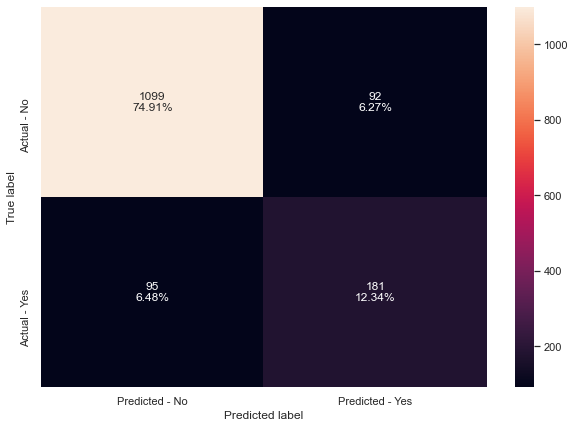

In [88]:
make_confusion_matrix(dtree,y_test)

**Confusion Matrix -**

* Customer bought the Product and the model predicted correctly that a customer will buy the product :  True Positive (observed=1,predicted=1)

* Customer didn't buy and the model predicted customer will buy the product : False Positive (observed=0,predicted=1)

* Customer didn't buy and the model predicted customer will not buy the product : True Negative (observed=0,predicted=0)

* Customer bought the product and the model predicted that the customer won't : False Negative (observed=1,predicted=0)

In [89]:
scores_dtree = get_metrics_score(dtree)

Accuracy on training set :  1.0
Accuracy on test set :  0.8725289706884799
Recall on training set :  1.0
Recall on test set :  0.6557971014492754
Precision on training set :  1.0
Precision on test set :  0.663003663003663


- Decision tree is working well with the training dataset, but the model is learning the noise as well as it is not generalizing well.

### Hyperparameter Tuning Decision Tree
**We will be using RandomizedSearchCV instead of GridSearchCV as per suggestion from our mentor, as it performs faster**

In [90]:
# Choose the type of classifier. 
dtree_tuned = DecisionTreeClassifier(random_state=1,class_weight={0:0.19,1:0.81})

# Grid of parameters to choose from
parameters = {'max_depth': list(np.arange(2,20)) + [None], 
              'min_samples_leaf': [1, 3, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10, 15] + [None],
              'min_impurity_decrease': [0.001, 0.01, 0.1, 0.0]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = RandomizedSearchCV(dtree_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.19, 1: 0.81}, max_depth=14,
                       min_samples_leaf=10, random_state=1)

In [91]:
scores_dtree_tuned = get_metrics_score(dtree_tuned)

Accuracy on training set :  0.8421514177141187
Accuracy on test set :  0.7695978186775733
Recall on training set :  0.9208074534161491
Recall on test set :  0.7644927536231884
Precision on training set :  0.5480591497227357
Precision on test set :  0.4359504132231405


* Tuned decision tree generalized well but the recall score is very less whch is about 67% on test data, we will see if bagging helps

In [92]:
# Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.19,1:0.81},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,20), 
              'min_samples_leaf': [1, 3, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.001,0.01,0.1,0.0]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = RandomizedSearchCV(dtree_estimator, parameters, scoring=scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.19, 1: 0.81}, max_depth=11,
                       max_leaf_nodes=10, min_samples_leaf=3, random_state=1)

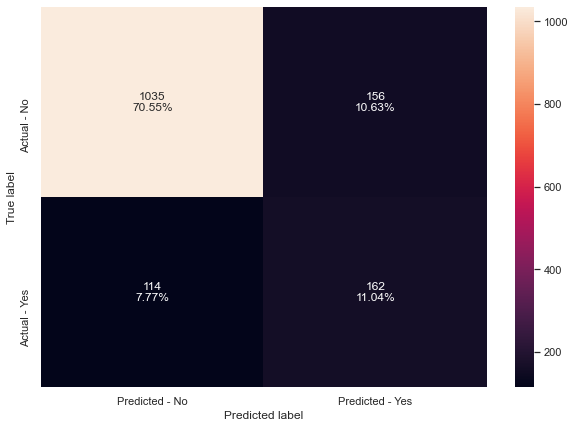

In [93]:
make_confusion_matrix(dtree_estimator,y_test)

In [94]:
scores_dtree_estimator = get_metrics_score(dtree_estimator)

Accuracy on training set :  0.8038585209003215
Accuracy on test set :  0.8159509202453987
Recall on training set :  0.5822981366459627
Recall on test set :  0.5869565217391305
Precision on training set :  0.4826254826254826
Precision on test set :  0.5094339622641509


In [95]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dtree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                      Imp
DurationOfPitch              1.450464e-01
Age                          1.173236e-01
MonthlyIncome                1.013679e-01
Passport                     8.496388e-02
NumberOfTrips                5.654894e-02
NumberOfFollowups            5.640266e-02
Designation_Executive        5.625235e-02
PitchSatisfactionScore       4.963747e-02
CityTier                     4.940001e-02
PreferredPropertyStar        3.929587e-02
MaritalStatus_Unmarried      3.214128e-02
MaritalStatus_Single         2.940749e-02
Occupation_Large Business    2.816426e-02
Gender_Male                  2.372594e-02
MaritalStatus_Married        1.962957e-02
OwnCar                       1.449282e-02
TypeofContact                1.408689e-02
Designation_Manager          1.358575e-02
NumberOfChildrenVisiting     1.355295e-02
NumberOfPersonVisiting       1.318360e-02
Occupation_Small Business    1.270867e-02
Designation_Senior Manager   1.231510e-02
Occupation_Salaried          9.441

In [96]:
feature_names = X_train.columns

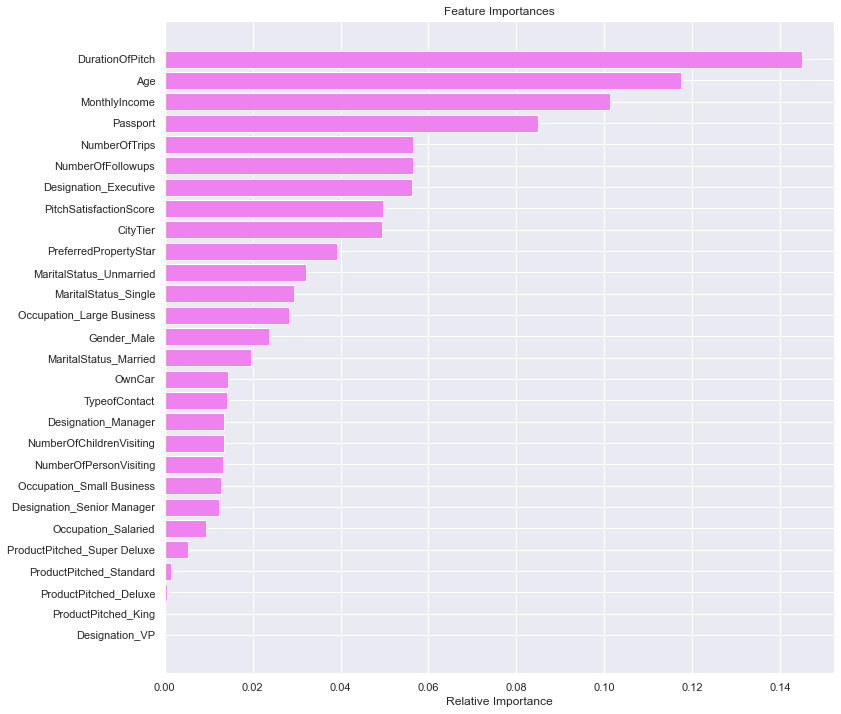

In [97]:
importances = dtree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Insights:
* Duration of the Pitch, Age, Monthly Income turned out to be significant features to predict whether a customer will buy a travel package

### Bagging Classifier

In [98]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train,y_train)

BaggingClassifier(random_state=1)

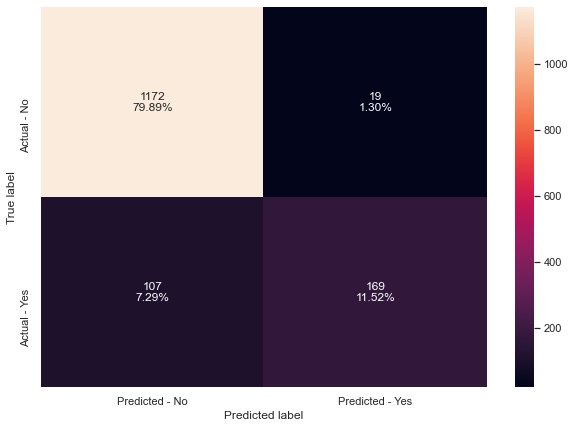

In [99]:
make_confusion_matrix(bagging,y_test)

In [100]:
scores_bagging = get_metrics_score(bagging)

Accuracy on training set :  0.9944460684010523
Accuracy on test set :  0.9141104294478528
Recall on training set :  0.9736024844720497
Recall on test set :  0.6123188405797102
Precision on training set :  0.9968203497615262
Precision on test set :  0.898936170212766


* Bagging classifier is overfitting the training dataset, accuracy and precision seems ok but recall is bad on test data.

#### Bagging classifier with weighted decision tree

In [101]:
bagging_wt = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',class_weight={0:0.19,1:0.81},random_state=1),random_state=1)
bagging_wt.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.19,
                                                                      1: 0.81},
                                                        random_state=1),
                  random_state=1)

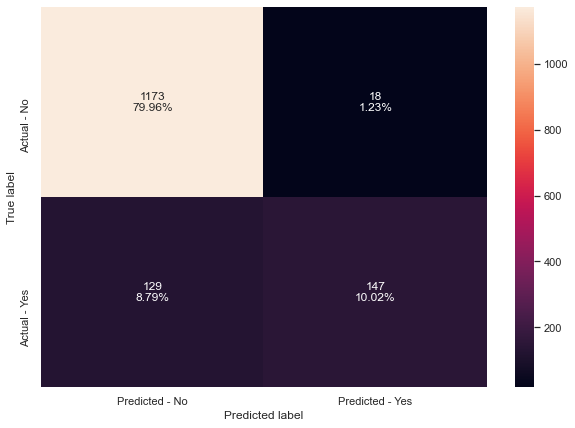

In [102]:
make_confusion_matrix(bagging_wt,y_test)

In [103]:
scores_bagging_wt = get_metrics_score(bagging_wt)

Accuracy on training set :  0.9929845074539608
Accuracy on test set :  0.8997955010224948
Recall on training set :  0.9658385093167702
Recall on test set :  0.532608695652174
Precision on training set :  0.9967948717948718
Precision on test set :  0.8909090909090909


* Model performance have not much improved, recall is still decreased

### Hypertuned Bagging Classifier

In [104]:
# grid search for bagging classifier
cl1 = DecisionTreeClassifier(class_weight={0:0.19,1:0.81},random_state=1)
param_grid = {'base_estimator':[cl1],
              'n_estimators':[5,7,15,51,101],
              'max_features': [0.7,0.8,0.9,1]
             }
scorer = metrics.make_scorer(metrics.recall_score)


grid = RandomizedSearchCV(BaggingClassifier(random_state=1,bootstrap=True),param_grid, scoring = scorer, cv = 5)
grid.fit(X_train, y_train)


## getting the best estimator
bagging_estimator = grid.best_estimator_
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.19,
                                                                      1: 0.81},
                                                        random_state=1),
                  max_features=1, n_estimators=51, random_state=1)

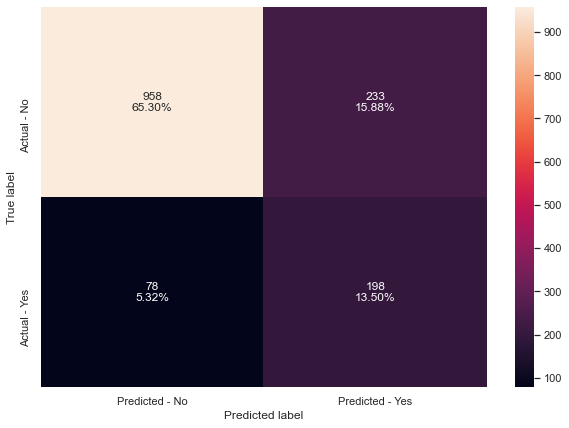

In [105]:
make_confusion_matrix(bagging_estimator,y_test)

In [106]:
scores_bagging_estimator = get_metrics_score(bagging_estimator)

Accuracy on training set :  0.8126278865828706
Accuracy on test set :  0.7880027266530334
Recall on training set :  0.7360248447204969
Recall on test set :  0.717391304347826
Precision on training set :  0.5015873015873016
Precision on test set :  0.4593967517401392


* Accuracy and Recall are good and there is no overfitting and model is generalizing well. Precision of the model is low

### Lets try using Logistic regression as basic estimator in Bagging classifier

In [107]:
bagging_lr=BaggingClassifier(base_estimator=LogisticRegression(random_state=1),random_state=1)
bagging_lr.fit(X_train,y_train)

BaggingClassifier(base_estimator=LogisticRegression(random_state=1),
                  random_state=1)

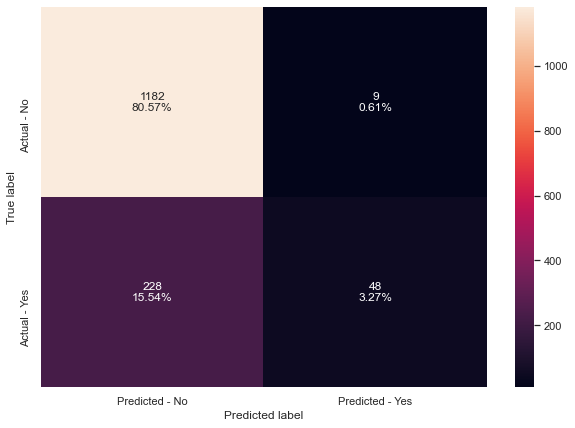

In [108]:
make_confusion_matrix(bagging_lr,y_test)

In [109]:
scores_LR = get_metrics_score(bagging_lr)

Accuracy on training set :  0.8363051739257527
Accuracy on test set :  0.8384458077709611
Recall on training set :  0.17080745341614906
Recall on test set :  0.17391304347826086
Precision on training set :  0.8088235294117647
Precision on test set :  0.8421052631578947


* The difference between training and testing metrics is less but 17% in the recall is poor

### Random Forest Classifier

In [110]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

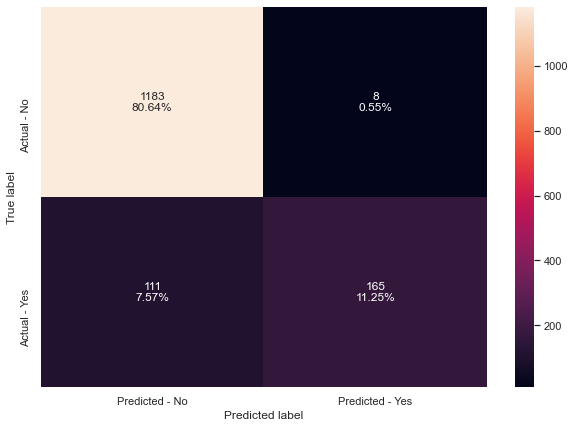

In [111]:
make_confusion_matrix(rf,y_test)

In [112]:
scores_rf = get_metrics_score(rf)

Accuracy on training set :  1.0
Accuracy on test set :  0.9188820722563054
Recall on training set :  1.0
Recall on test set :  0.5978260869565217
Precision on training set :  1.0
Precision on test set :  0.953757225433526


* Random Forest has performed well in terms of accuracy and precision, but recall of 60% is still on the lower side.

#### Random Forest with class weights

In [113]:
rf_wt = RandomForestClassifier(class_weight={0:0.19,1:0.81}, random_state=1)
rf_wt.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.19, 1: 0.81}, random_state=1)

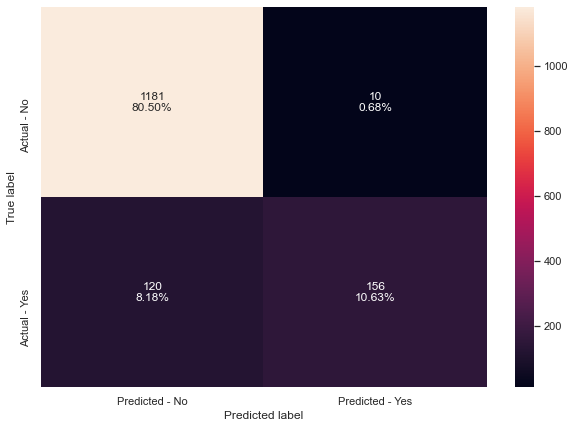

In [114]:
make_confusion_matrix(rf_wt,y_test)

In [115]:
scores_rf_wt = get_metrics_score(rf_wt)

Accuracy on training set :  1.0
Accuracy on test set :  0.9113837764144512
Recall on training set :  1.0
Recall on test set :  0.5652173913043478
Precision on training set :  1.0
Precision on test set :  0.9397590361445783


* The performance of the model didnot improve much from the original random forest model

### Tuned Random Forest Classifier

In [116]:
# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(class_weight={0:0.19,1:0.81}, random_state=1)

# Grid of parameters to choose from
parameters = {"n_estimators": [150,200,250],
    "min_samples_leaf": np.arange(1,6,1),
    "max_features": [0.7,0.9,'log2','auto'],
    "max_samples": np.arange(0.3, 0.7, 0.1),
             }

scorer = metrics.make_scorer(metrics.recall_score)
# Run the grid search
grid_obj = RandomizedSearchCV(rf_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.19, 1: 0.81}, max_samples=0.5,
                       min_samples_leaf=5, n_estimators=200, random_state=1)

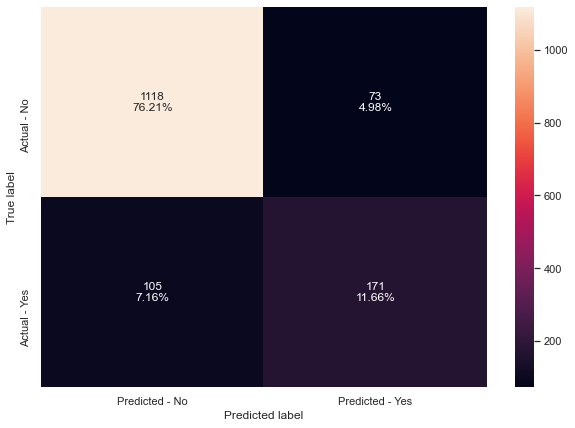

In [117]:
make_confusion_matrix(rf_tuned,y_test)

In [118]:
scores_rf_tuned = get_metrics_score(rf_tuned)

Accuracy on training set :  0.9234142063724057
Accuracy on test set :  0.8786639400136332
Recall on training set :  0.8291925465838509
Recall on test set :  0.6195652173913043
Precision on training set :  0.7784256559766763
Precision on test set :  0.7008196721311475


* Accuracy and Precision are well, the model is not overfitting but recall is 64%

In [119]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(rf_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                  Imp
MonthlyIncome                0.112214
Age                          0.109894
Passport                     0.109680
DurationOfPitch              0.094109
NumberOfTrips                0.053052
Designation_Executive        0.050119
PitchSatisfactionScore       0.047928
CityTier                     0.047364
NumberOfFollowups            0.044972
PreferredPropertyStar        0.040347
MaritalStatus_Single         0.034959
MaritalStatus_Married        0.027888
NumberOfChildrenVisiting     0.023028
Gender_Male                  0.021347
TypeofContact                0.019661
NumberOfPersonVisiting       0.019152
MaritalStatus_Unmarried      0.016891
Occupation_Salaried          0.016830
ProductPitched_Deluxe        0.016433
OwnCar                       0.016390
Occupation_Small Business    0.015906
Designation_Manager          0.015797
Occupation_Large Business    0.012285
ProductPitched_Super Deluxe  0.011037
ProductPitched_Standard      0.008758
Designation_

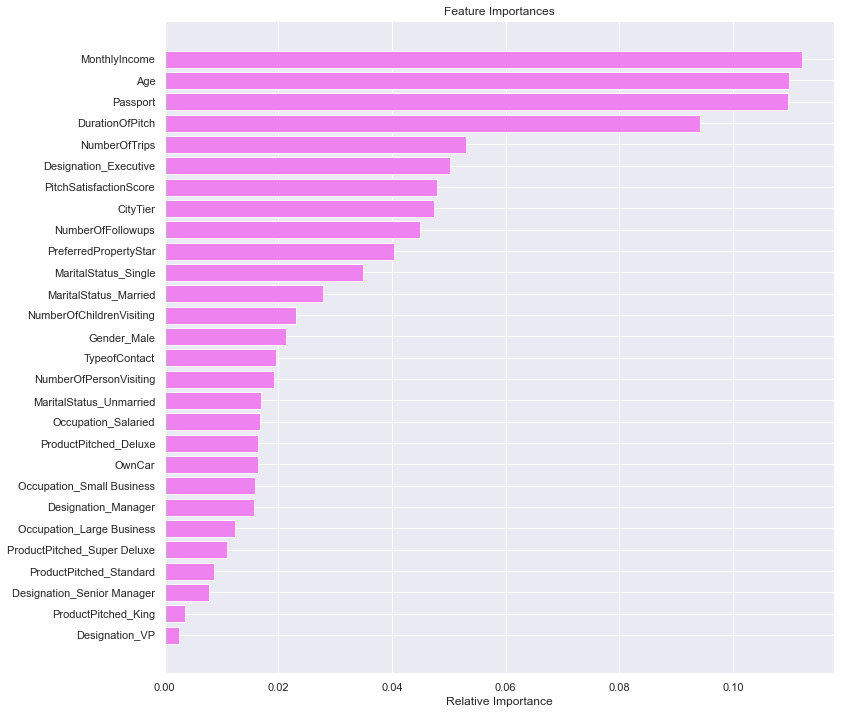

In [120]:
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Insights:
* Age, Monthly Income and whether the customer has a passport turned out to be significant features to predict whether a customer will buy a travel package

### Boosting Models

### AdaBoost Classifier

In [121]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

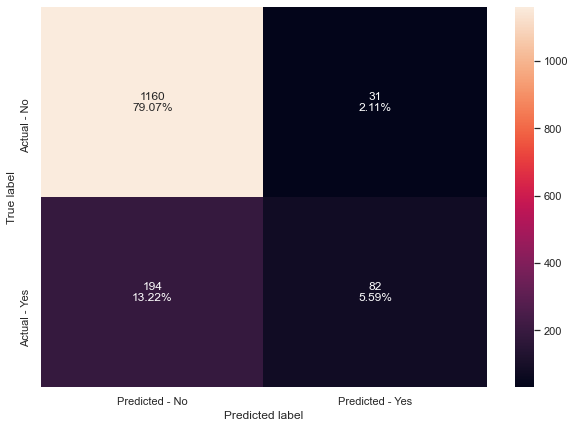

In [122]:
make_confusion_matrix(abc,y_test)

In [123]:
scores_abc = get_metrics_score(abc)

Accuracy on training set :  0.8491669102601579
Accuracy on test set :  0.8466257668711656
Recall on training set :  0.2996894409937888
Recall on test set :  0.2971014492753623
Precision on training set :  0.748062015503876
Precision on test set :  0.7256637168141593


* The model is not overfitting, accuracy and precision are good but recall is very low.

### Hypertuned Ada Boost Classifier

In [124]:
# Choose the type of classifier. 
abc_estimator = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {"base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}
scorer = metrics.make_scorer(metrics.recall_score)
# Run the grid search
grid_obj = RandomizedSearchCV(abc_estimator, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
abc_estimator.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=1.7000000000000002, random_state=1)

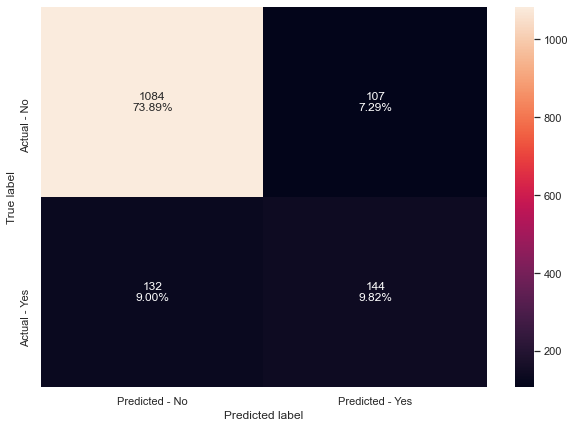

In [125]:
make_confusion_matrix(abc_estimator,y_test)

In [126]:
scores_abc_estimator = get_metrics_score(abc_estimator)

Accuracy on training set :  0.9137679041216019
Accuracy on test set :  0.8370824812542604
Recall on training set :  0.7236024844720497
Recall on test set :  0.5217391304347826
Precision on training set :  0.7993138936535163
Precision on test set :  0.5737051792828686


In [127]:
# importance of features in the tree building

print(pd.DataFrame(abc_estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                      Imp
MonthlyIncome                3.048282e-01
Age                          1.536644e-01
DurationOfPitch              1.343889e-01
PitchSatisfactionScore       6.817138e-02
NumberOfTrips                4.414133e-02
CityTier                     3.820904e-02
Passport                     3.136639e-02
NumberOfFollowups            2.475084e-02
Designation_Executive        2.371264e-02
OwnCar                       2.346402e-02
NumberOfPersonVisiting       2.099024e-02
TypeofContact                1.867730e-02
PreferredPropertyStar        1.843481e-02
Gender_Male                  1.221451e-02
MaritalStatus_Married        1.213419e-02
MaritalStatus_Single         1.181641e-02
NumberOfChildrenVisiting     1.157363e-02
Designation_Manager          9.773001e-03
ProductPitched_Super Deluxe  8.467905e-03
MaritalStatus_Unmarried      7.564586e-03
Occupation_Large Business    4.918041e-03
ProductPitched_Deluxe        3.855479e-03
Occupation_Salaried          3.363

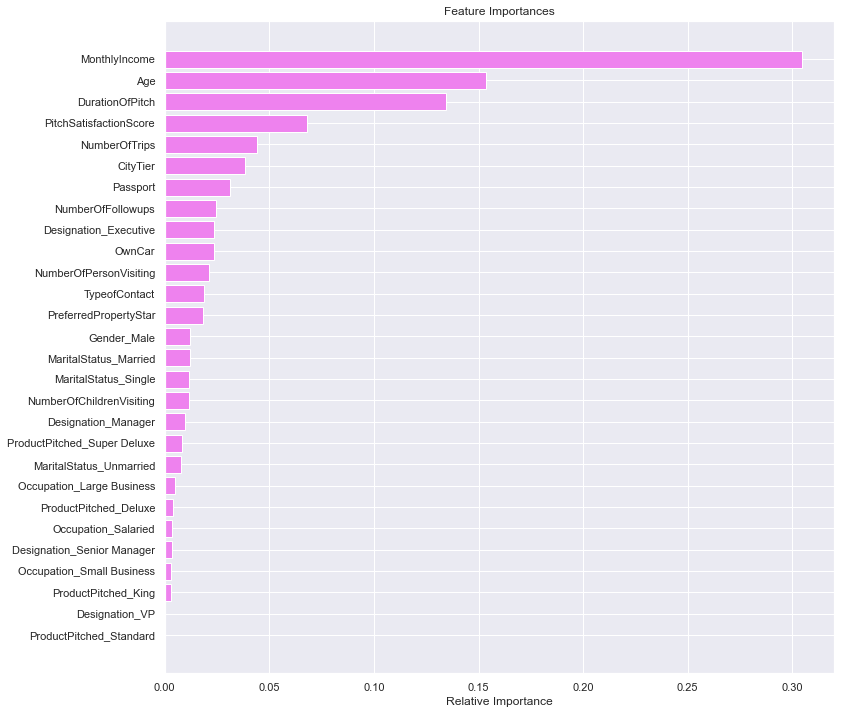

In [128]:
feature_names = X_train.columns
importances = abc_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* Monthly income seems to have the highest priority, followed by DUration of the pitch and age 

### Gradient Boosting Classifier

In [129]:
gbc=GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

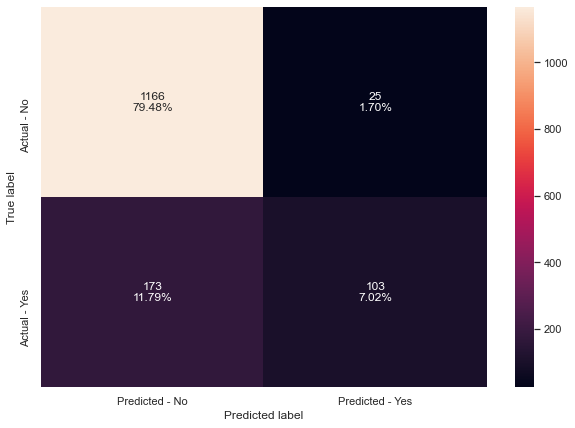

In [130]:
make_confusion_matrix(gbc,y_test)

In [131]:
scores_gbc = get_metrics_score(gbc)

Accuracy on training set :  0.8868751826951183
Accuracy on test set :  0.8650306748466258
Recall on training set :  0.4549689440993789
Recall on test set :  0.37318840579710144
Precision on training set :  0.8905775075987842
Precision on test set :  0.8046875


### Hypertuned Gradient Boosting Classifier

In [132]:
# Choose the type of classifier. 
gb_tuned = GradientBoostingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(50,400,25),
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1],
    "min_samples_leaf": np.arange(0,15,1),
    "learning_rate": [0.01, 0.1, 0.2, 0.3]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = RandomizedSearchCV(gb_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
gb_tuned.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.3, max_features=0.7,
                           min_samples_leaf=3, n_estimators=150, random_state=1,
                           subsample=1)

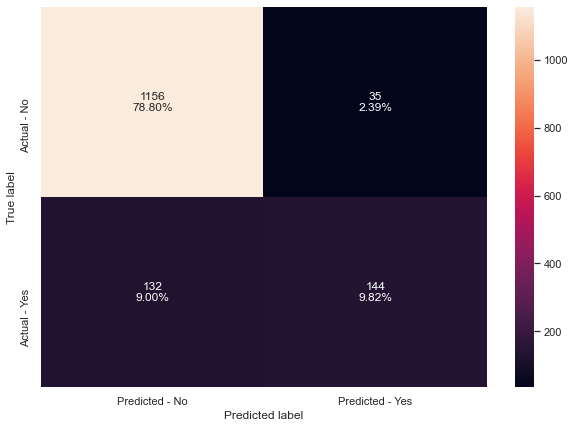

In [133]:
make_confusion_matrix(gb_tuned,y_test)

In [134]:
scores_gb_tuned = get_metrics_score(gb_tuned)

Accuracy on training set :  0.9482607424729611
Accuracy on test set :  0.8861622358554874
Recall on training set :  0.7484472049689441
Recall on test set :  0.5217391304347826
Precision on training set :  0.9698189134808853
Precision on test set :  0.8044692737430168


In [135]:
# importance of features in the tree building

print(pd.DataFrame(gb_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                  Imp
MonthlyIncome                0.211043
Age                          0.141588
Passport                     0.117792
DurationOfPitch              0.104583
NumberOfFollowups            0.057896
CityTier                     0.047338
MaritalStatus_Single         0.046050
NumberOfTrips                0.040843
PitchSatisfactionScore       0.039500
Designation_Manager          0.033212
Designation_Executive        0.030270
PreferredPropertyStar        0.030116
MaritalStatus_Unmarried      0.020421
TypeofContact                0.010386
Occupation_Large Business    0.009522
Designation_Senior Manager   0.007427
ProductPitched_Standard      0.006691
Occupation_Small Business    0.006669
NumberOfPersonVisiting       0.006647
NumberOfChildrenVisiting     0.006494
ProductPitched_Deluxe        0.005712
OwnCar                       0.005478
Gender_Male                  0.005266
ProductPitched_Super Deluxe  0.004170
Occupation_Salaried          0.002464
ProductPitch

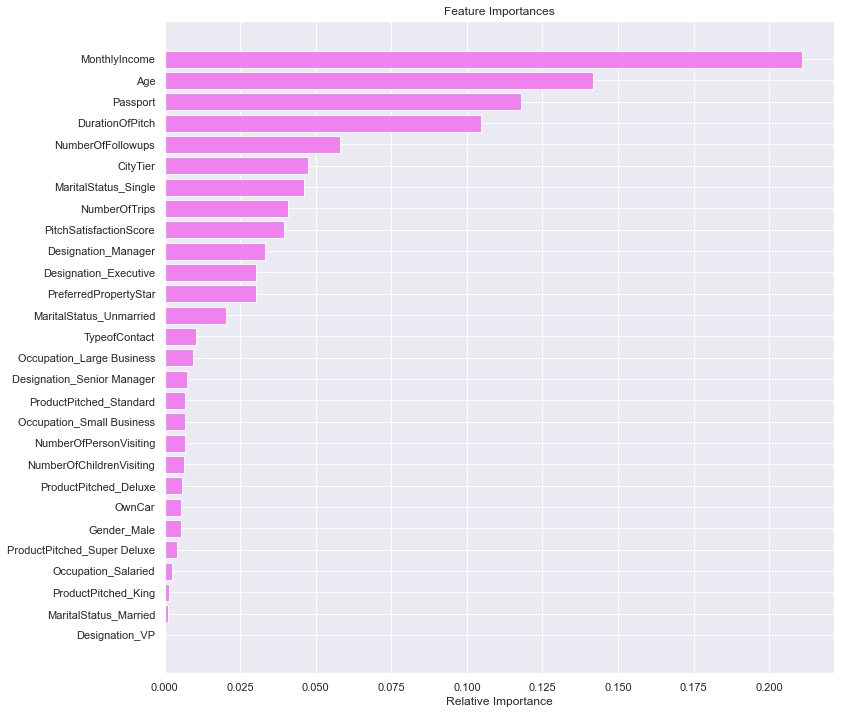

In [136]:
feature_names = X_train.columns
importances = gb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### XG Boost Classifier

In [137]:
xgb=XGBClassifier(random_state=1,eval_metric = 'logloss')
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

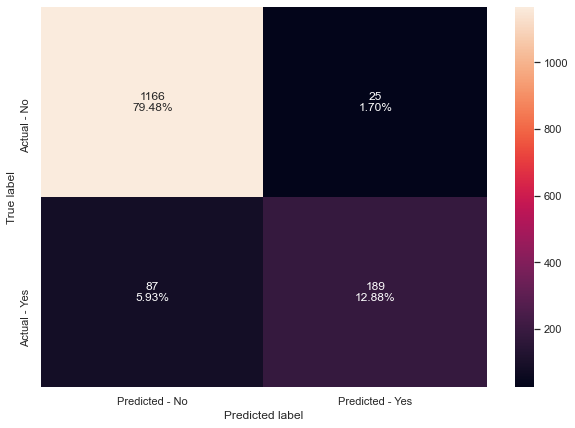

In [138]:
make_confusion_matrix(xgb,y_test)

In [139]:
scores_xgb = get_metrics_score(xgb)

Accuracy on training set :  0.9997076878105817
Accuracy on test set :  0.923653715064758
Recall on training set :  0.9984472049689441
Recall on test set :  0.6847826086956522
Precision on training set :  1.0
Precision on test set :  0.883177570093458


### Hyper parameter Tuned XG Boost Classifier

In [140]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1,eval_metric = 'logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(10,100,20),
    "scale_pos_weight":[0,1,2,5],
    "subsample":[0.5,0.7,0.9,1],
    "learning_rate":[0.01,0.1,0.2,0.05],
    "gamma":[0,1,3],
    "colsample_bytree":[0.5,0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,0.9,1]
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = RandomizedSearchCV(xgb_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=3, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=4,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=5, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [141]:
scores_xgb_tuned = get_metrics_score(xgb_tuned)

Accuracy on training set :  0.9710610932475884
Accuracy on test set :  0.896387184730743
Recall on training set :  0.9984472049689441
Recall on test set :  0.8007246376811594
Precision on training set :  0.8677462887989204
Precision on test set :  0.6949685534591195


In [142]:
estimators=[('Bagging Classifier', bagging_estimator),('Decision Tree', dtree_tuned),
           ('Gradient Boosting', gb_tuned)]
final_estimator=XGBClassifier(random_state=1,eval_metric = 'logloss')

In [143]:
stacking_estimator=StackingClassifier(estimators=estimators, final_estimator=final_estimator,cv=5)
stacking_estimator.fit(X_train,y_train)

StackingClassifier(cv=5,
                   estimators=[('Bagging Classifier',
                                BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.19,
                                                                                                      1: 0.81},
                                                                                        random_state=1),
                                                  max_features=1,
                                                  n_estimators=51,
                                                  random_state=1)),
                               ('Decision Tree',
                                DecisionTreeClassifier(class_weight={0: 0.19,
                                                                     1: 0.81},
                                                       max_depth=14,
                                                       min_samples_leaf=10,
                                         

In [144]:
scores_stacking = get_metrics_score(stacking_estimator)

Accuracy on training set :  0.9371528792750657
Accuracy on test set :  0.869120654396728
Recall on training set :  0.7624223602484472
Recall on test set :  0.5688405797101449
Precision on training set :  0.8878842676311031
Precision on test set :  0.6826086956521739


In [145]:
# defining list of models
models = [dtree,dtree_tuned,dtree_estimator,bagging,bagging_wt,bagging_estimator,rf,rf_wt,rf_tuned,abc,
          abc_estimator, gbc,gb_tuned,xgb,xgb_tuned]
# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy,recall and precision scores
for model in models:
    # accuracy score
    j = get_metrics_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [146]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree',
                                          'Decision Tree - Tuned',
                                          'Decision Tree - Tuned 1',
                                          'Bagging',
                                          'Bagging with weights',
                                          'Bagging tuned',
                                          'Random Forest',
                                          'Random Forest with weights',
                                          'Random Forest tuned',
                                          'Ada Boost',
                                          'Ada Boos Tuned',
                                          'Gradient Boost',
                                          'Gradient Boost Tuned',
                                          'XG Boost',
                                          'XG Boost Tuned'                                          
                                          ],
                                          'Train_Accuracy':acc_train, 
                                          'Test_Accuracy':acc_test,
                                          'Train Recall':recall_train,
                                          'Test Recall':recall_test, 
                                          'Train Precision':precision_train,
                                          'Test Precision':precision_test
                                })
                                    

comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train Recall,Test Recall,Train Precision,Test Precision
0,Decision Tree,1.000000,0.872529,1.000000,0.655797,1.000000,0.663004
1,Decision Tree - Tuned,0.842151,0.769598,0.920807,0.764493,0.548059,0.435950
2,Decision Tree - Tuned 1,0.803859,0.815951,0.582298,0.586957,0.482625,0.509434
3,Bagging,0.994446,0.914110,0.973602,0.612319,0.996820,0.898936
4,Bagging with weights,0.992985,0.899796,0.965839,0.532609,0.996795,0.890909
5,Bagging tuned,0.812628,0.788003,0.736025,0.717391,0.501587,0.459397
6,Random Forest,1.000000,0.918882,1.000000,0.597826,1.000000,0.953757
7,Random Forest with weights,1.000000,0.911384,1.000000,0.565217,1.000000,0.939759
8,Random Forest tuned,0.923414,0.878664,0.829193,0.619565,0.778426,0.700820
9,Ada Boost,0.849167,0.846626,0.299689,0.297101,0.748062,0.725664


## Insights and Business Recommendations
* We have built several models to try and predict whether a customer would purchase the newly launched wellness travel package and identify important features that would drive the marketing team to identify potential customers
* Recall (True Positive rate) is considered main performance metric as the company doesnot want to lose a potential customer. 
* We also need to understand customer profiles which helps in better targeting appropriate customers and thus reduce marketing cost.
* As seen in the initial Data analysis, designation was directly related to the product that was pitched to the customer, which might lead to a customer not knowing of the product that would really intrest the customer and turn him into a revenue generating customer.
* Promising conversion rate of basic package and deluxe package is a good sign to launch wellness package.
* It is also better to reduce the number of packages as we have seen in the Exploratory Data Analysis, Standard and Deluxe tend to have similar profile of customers. 
* For wellness travel package, customers with passport will have a higher likelihood of buying the package as these well being packages tend to be for medical purpose and mental peace where a customer would prefer travelling to international places.
* With mental health taking a higher priority in most sectors of work, a wellness program will most likely help the company in expansion of customer base and sales.
* As we have seen from all the models Age, Monthly income, duration of Pitch and having a passport were having major impact on whether a customer would purchase a travel package or not.
* Number of trips could include business travel as well as vacations with family, understanding the nature of trips will help in suggesting an appropriate package
* The model we have gives a good prediction than randomly reaching out to a customer and increasing marketing cost with a 92% accuracy of predicting which customer would purchase a product. 